In [3]:
#imported necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols

In [4]:
data = pd.read_csv('data/kc_house_data.csv')

In [5]:
data.yr_renovated.fillna(0, inplace=True)
data.waterfront.fillna('NO', inplace=True)
data.view.fillna('NONE', inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
data.drop(columns=['id', 'date'], inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [9]:
#cities and corresponding zipcodes data
cities = {'Algona': [98001], 'Auburn': [98001, 98002, 98003, 98023, 98063, 98071, 98092, 98093], 'Federal Way': [98001, 98003, 98023, 98063, 98093],
         'Beaux Arts Village': [98004], 'Bellevue':[98004, 98005, 98006, 98007, 98008, 98009, 98015], 
          'Clyde Hill': [98004], 'Hunts Point': [98004], 'Yarrow Point': [98004], 'Black Diamond': [98010],
         'Bothell': [98011, 98041, 98028], 'Burton': [98013], 'Vashion': [98013], 'Carnation': [98014],
         'Duvall':[98019], 'Enumclaw': [98022], 'Fall City': [98024], 'Hobart': [98025], 
         'Issaquah': [98027], 'Kent': [98030, 98031, 98032, 98035, 98042, 98064], 'Kirkland':[98033, 98034, 98083],
         'Maple Valley': [98038], 'Medina': [98039], 'Mercer Island': [98040], 'Kenmore': [98028],
         'Covington':[98042], 'North Bend': [98045], 'Pacific':[98047], 'Preston':[98050],
         'Ravensdale':[98051], 'Redmond': [98052, 98053, 98073, 98074], 'Redondo': [98054], 'Renton': [98055, 98056, 98057, 98058, 98059],
         'Newcastle': [98056, 98059,], 'Seahurst':[98062], 'Snoqualmie': [98065, 98068], 'Snoqualmie Pass': [98068],
         'Vashon': [98070], 'Woodinville': [98072], 'Sammamish':[98075, 98075], 'Issaquah': [98075, 98027, 98029],
         'Seattle': [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 
                     98126, 98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 98171, 98174, 98177, 98178, 98188, 98198, 98199 ], 
          'Tukwila': [98108, 98138, 98168, 98178, 98188],
         'Shoreline': [98133, 98155, 98177 ], 'Burien': [98146, 98148, 98166, 98168 ], 'Des Moines' : [98148, 98198], 'Normandy Park': [98148, 98166, 98198], 'Seatac': [98148, 98158, 98168, 98188, 98198], 
          'Lake Forest Park': [98155, 98155, 98155], 'Baring': [98224], 'Skykomish': [98288]}

In [10]:
def city_finder(zipcode):
    
    lst = []
    for key, value in cities.items():
        if zipcode in value:
            lst.append(key)
    
    if lst != []:
        return lst
    else:
        return None

In [11]:
data['cities'] = data.zipcode.apply(lambda x: city_finder(x))
data.cities.isna().sum()

198

In [12]:
data.dropna(inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21399 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21399 non-null  float64
 1   bedrooms       21399 non-null  int64  
 2   bathrooms      21399 non-null  float64
 3   sqft_living    21399 non-null  int64  
 4   sqft_lot       21399 non-null  int64  
 5   floors         21399 non-null  float64
 6   waterfront     21399 non-null  object 
 7   view           21399 non-null  object 
 8   condition      21399 non-null  object 
 9   grade          21399 non-null  object 
 10  sqft_above     21399 non-null  int64  
 11  sqft_basement  21399 non-null  object 
 12  yr_built       21399 non-null  int64  
 13  yr_renovated   21399 non-null  float64
 14  zipcode        21399 non-null  int64  
 15  lat            21399 non-null  float64
 16  long           21399 non-null  float64
 17  sqft_living15  21399 non-null  int64  
 18  sqft_l

In [14]:
def binary_cities(lst, city):   
    """
    
    This function takes two arguments: the list of genres from the movie.genre column in each row
    and a specify genre. Ex: binary_genres(['Comedy', 'Drama'], 'Comedy')
    
    Returns 1 if genre in lst
    Returns 0 if genre not in lst
    
    
    """
    
    if city in lst:
        return 1
    else:
        return 0
    
#looping through genre columns to apply binary_genres function to add new columns
for i in cities.keys():
    data[i] = data.cities.apply(lambda x: binary_cities(x, i))

In [16]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'cities', 'Algona', 'Auburn',
       'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill',
       'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Burton',
       'Vashion', 'Carnation', 'Duvall', 'Enumclaw', 'Fall City', 'Hobart',
       'Issaquah', 'Kent', 'Kirkland', 'Maple Valley', 'Medina',
       'Mercer Island', 'Kenmore', 'Covington', 'North Bend', 'Pacific',
       'Preston', 'Ravensdale', 'Redmond', 'Redondo', 'Renton', 'Newcastle',
       'Seahurst', 'Snoqualmie', 'Snoqualmie Pass', 'Vashon', 'Woodinville',
       'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien', 'Des Moines',
       'Normandy Park', 'Seatac', 'Lake Forest Park', 'Baring', 'Skykomish'],
      dtype='object')

In [17]:
t = []
for i in cities.keys():
    print('{} : {}'.format(i, data[i].sum()))
    t.append(data[i].sum())
    
sum(t)

Algona : 361
Auburn : 1690
Federal Way : 1140
Beaux Arts Village : 317
Bellevue : 1407
Clyde Hill : 317
Hunts Point : 317
Yarrow Point : 317
Black Diamond : 100
Bothell : 478
Burton : 0
Vashion : 0
Carnation : 124
Duvall : 190
Enumclaw : 233
Fall City : 80
Hobart : 0
Issaquah : 1092
Kent : 1201
Kirkland : 977
Maple Valley : 589
Medina : 50
Mercer Island : 282
Kenmore : 283
Covington : 547
North Bend : 220
Pacific : 0
Preston : 0
Ravensdale : 0
Redmond : 1418
Redondo : 0
Renton : 1597
Newcastle : 874
Seahurst : 0
Snoqualmie : 308
Snoqualmie Pass : 0
Vashon : 117
Woodinville : 273
Sammamish : 359
Seattle : 8973
Tukwila : 853
Shoreline : 1194
Burien : 868
Des Moines : 337
Normandy Park : 591
Seatac : 742
Lake Forest Park : 446
Baring : 0
Skykomish : 0


31262

In [18]:
deleted_list = []
for i in cities.keys():
    if data[i].sum() == 0:
        deleted_list.append(i)
        del data[i]
    else:
        continue
deleted_list

['Burton',
 'Vashion',
 'Hobart',
 'Pacific',
 'Preston',
 'Ravensdale',
 'Redondo',
 'Seahurst',
 'Snoqualmie Pass',
 'Baring',
 'Skykomish']

In [19]:
for i in deleted_list:
    cities.pop(i)
    
cities

{'Algona': [98001],
 'Auburn': [98001, 98002, 98003, 98023, 98063, 98071, 98092, 98093],
 'Federal Way': [98001, 98003, 98023, 98063, 98093],
 'Beaux Arts Village': [98004],
 'Bellevue': [98004, 98005, 98006, 98007, 98008, 98009, 98015],
 'Clyde Hill': [98004],
 'Hunts Point': [98004],
 'Yarrow Point': [98004],
 'Black Diamond': [98010],
 'Bothell': [98011, 98041, 98028],
 'Carnation': [98014],
 'Duvall': [98019],
 'Enumclaw': [98022],
 'Fall City': [98024],
 'Issaquah': [98075, 98027, 98029],
 'Kent': [98030, 98031, 98032, 98035, 98042, 98064],
 'Kirkland': [98033, 98034, 98083],
 'Maple Valley': [98038],
 'Medina': [98039],
 'Mercer Island': [98040],
 'Kenmore': [98028],
 'Covington': [98042],
 'North Bend': [98045],
 'Redmond': [98052, 98053, 98073, 98074],
 'Renton': [98055, 98056, 98057, 98058, 98059],
 'Newcastle': [98056, 98059],
 'Snoqualmie': [98065, 98068],
 'Vashon': [98070],
 'Woodinville': [98072],
 'Sammamish': [98075, 98075],
 'Seattle': [98101,
  98102,
  98103,
  98104

In [20]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Woodinville,Sammamish,Seattle,Tukwila,Shoreline,Burien,Des Moines,Normandy Park,Seatac,Lake Forest Park
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,...,0,0,1,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,...,0,0,1,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'cities', 'Algona', 'Auburn',
       'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill',
       'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Carnation',
       'Duvall', 'Enumclaw', 'Fall City', 'Issaquah', 'Kent', 'Kirkland',
       'Maple Valley', 'Medina', 'Mercer Island', 'Kenmore', 'Covington',
       'North Bend', 'Redmond', 'Renton', 'Newcastle', 'Snoqualmie', 'Vashon',
       'Woodinville', 'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien',
       'Des Moines', 'Normandy Park', 'Seatac', 'Lake Forest Park'],
      dtype='object')

In [25]:
data.waterfront.replace('NO', 0, inplace=True)
data.waterfront.replace('YES', 1, inplace=True)

In [27]:
data.waterfront.value_counts()

0    21253
1      146
Name: waterfront, dtype: int64

In [35]:
data.sqft_basement.unique()
data.sqft_basement.replace('?', '0', inplace=True)

In [39]:
data.sqft_basement = data.sqft_basement.astype('float')

In [40]:
data['has_basement'] = data.sqft_basement.apply(lambda x: 0 if x == 0.0 else 1)
data.has_basement.value_counts()

0    13122
1     8277
Name: has_basement, dtype: int64

In [42]:
data.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [44]:
data['recently_renovated'] = data.yr_renovated.apply(lambda x: 0 if x < 2000 else 1)

In [46]:
data.recently_renovated.value_counts()

0    21021
1      378
Name: recently_renovated, dtype: int64

In [51]:
data.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [53]:
data.grade = data.grade.astype('category')

In [54]:
data.grade.unique()

['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better', ..., '10 Very Good', '12 Luxury', '4 Low', '3 Poor', '13 Mansion']
Length: 11
Categories (11, object): ['7 Average', '6 Low Average', '8 Good', '11 Excellent', ..., '12 Luxury', '4 Low', '3 Poor', '13 Mansion']

In [59]:
data.grade = data.grade.cat.reorder_categories(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
                                                '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])

In [61]:
data.grade.cat.codes

0        4
1        4
2        3
3        4
4        5
        ..
21592    5
21593    5
21594    4
21595    5
21596    4
Length: 21399, dtype: int8

In [62]:
data.grade

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21399, dtype: category
Categories (11, object): ['3 Poor', '4 Low', '5 Fair', '6 Low Average', ..., '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']

In [64]:
data.condition.unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [65]:
data.condition = data.condition.astype('category')

In [66]:
data.condition = data.condition.cat.reorder_categories(['Fair', 'Poor', 'Average',
                                                        'Good', 'Very Good'])
data.condition

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21399, dtype: category
Categories (5, object): ['Fair', 'Poor', 'Average', 'Good', 'Very Good']

In [67]:
data.condition.cat.codes

0        2
1        2
2        2
3        4
4        2
        ..
21592    2
21593    2
21594    2
21595    2
21596    2
Length: 21399, dtype: int8

In [68]:
data.view.unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [71]:
data.view = data.view.astype('category')
data.view = data.view.cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])
data.view.cat.codes.value_counts()

0    19288
2      956
3      508
1      330
4      317
dtype: int64

In [72]:
cities

{'Algona': [98001],
 'Auburn': [98001, 98002, 98003, 98023, 98063, 98071, 98092, 98093],
 'Federal Way': [98001, 98003, 98023, 98063, 98093],
 'Beaux Arts Village': [98004],
 'Bellevue': [98004, 98005, 98006, 98007, 98008, 98009, 98015],
 'Clyde Hill': [98004],
 'Hunts Point': [98004],
 'Yarrow Point': [98004],
 'Black Diamond': [98010],
 'Bothell': [98011, 98041, 98028],
 'Carnation': [98014],
 'Duvall': [98019],
 'Enumclaw': [98022],
 'Fall City': [98024],
 'Issaquah': [98075, 98027, 98029],
 'Kent': [98030, 98031, 98032, 98035, 98042, 98064],
 'Kirkland': [98033, 98034, 98083],
 'Maple Valley': [98038],
 'Medina': [98039],
 'Mercer Island': [98040],
 'Kenmore': [98028],
 'Covington': [98042],
 'North Bend': [98045],
 'Redmond': [98052, 98053, 98073, 98074],
 'Renton': [98055, 98056, 98057, 98058, 98059],
 'Newcastle': [98056, 98059],
 'Snoqualmie': [98065, 98068],
 'Vashon': [98070],
 'Woodinville': [98072],
 'Sammamish': [98075, 98075],
 'Seattle': [98101,
  98102,
  98103,
  98104

[361,
 1690,
 1140,
 317,
 1407,
 317,
 317,
 317,
 100,
 478,
 0,
 0,
 124,
 190,
 233,
 80,
 0,
 1092,
 1201,
 977,
 589,
 50,
 282,
 283,
 547,
 220,
 0,
 0,
 0,
 1418,
 0,
 1597,
 874,
 0,
 308,
 0,
 117,
 273,
 359,
 8973,
 853,
 1194,
 868,
 337,
 591,
 742,
 446,
 0,
 0]

In [74]:
sum_list = []
for i in cities.keys():
    print('{} : {}'.format(i, data[i].sum()))
    sum_list.append(data[i].sum())

Algona : 361
Auburn : 1690
Federal Way : 1140
Beaux Arts Village : 317
Bellevue : 1407
Clyde Hill : 317
Hunts Point : 317
Yarrow Point : 317
Black Diamond : 100
Bothell : 478
Carnation : 124
Duvall : 190
Enumclaw : 233
Fall City : 80
Issaquah : 1092
Kent : 1201
Kirkland : 977
Maple Valley : 589
Medina : 50
Mercer Island : 282
Kenmore : 283
Covington : 547
North Bend : 220
Redmond : 1418
Renton : 1597
Newcastle : 874
Snoqualmie : 308
Vashon : 117
Woodinville : 273
Sammamish : 359
Seattle : 8973
Tukwila : 853
Shoreline : 1194
Burien : 868
Des Moines : 337
Normandy Park : 591
Seatac : 742
Lake Forest Park : 446


In [77]:
city_dfs = {}

for i in cities.keys():
    
    df = data[data[i] == 1]
    city_dfs[i] = df

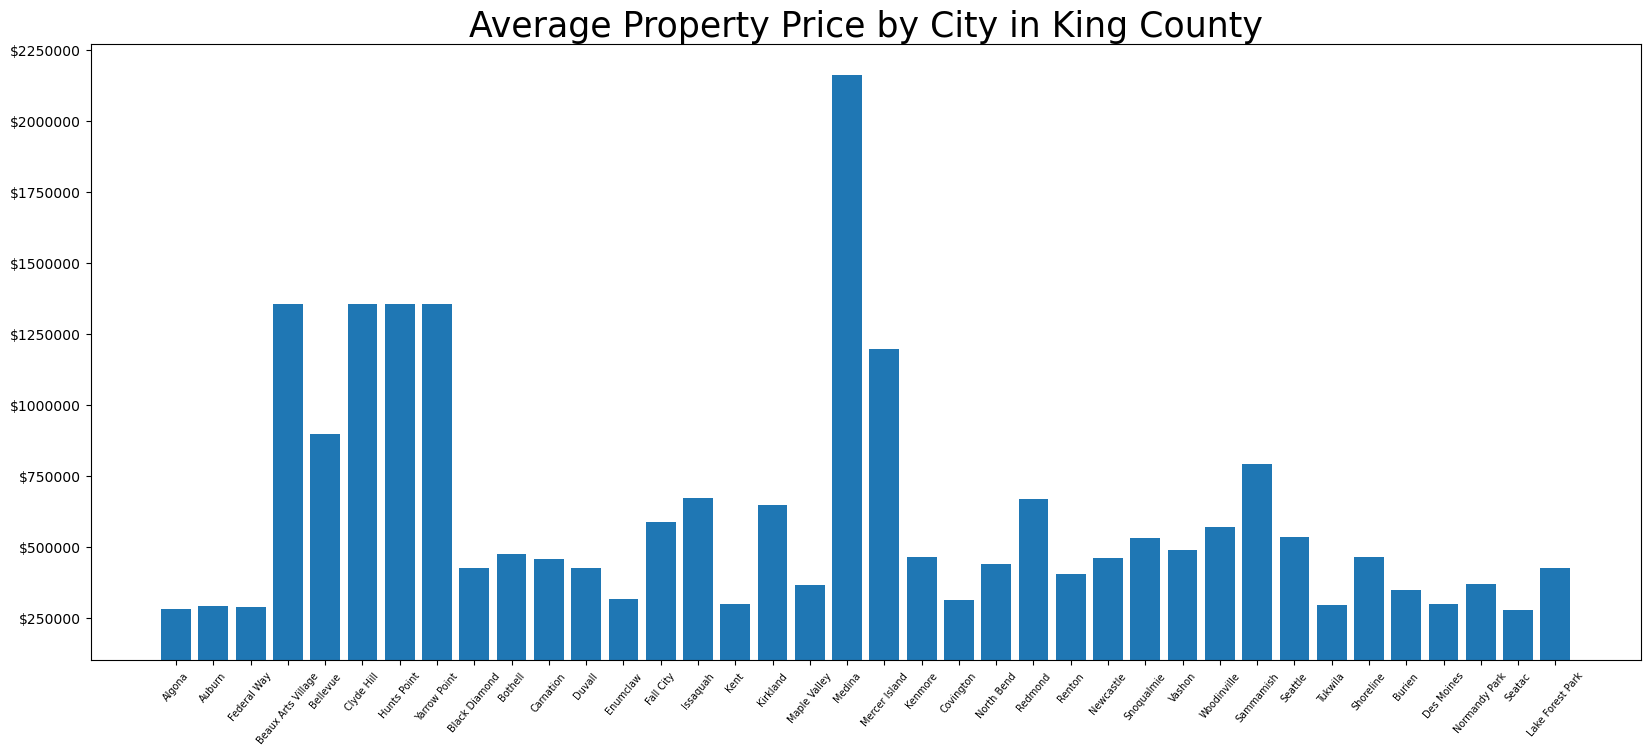

In [90]:
mean_prices = []

for key, values in city_dfs.items():
    mean = city_dfs[key]['price'].mean()
    mean_prices.append(mean)

    
    
fig, ax = plt.subplots(figsize=(20,8))

ax.bar(list(range(len(city_dfs.keys()))), mean_prices)
ax.set_xticks(list(range(len(city_dfs.keys()))))
ax.set_xticklabels(city_dfs.keys(), rotation =50, fontsize=7)
ax.set_yticks(list(range(0, 2500000, 250000)))
ax.set_yticklabels(['${}'.format(i) for i in range(0,2500000, 250000)])

ax.set_ylim(100000)

ax.set_title('Average Property Price by City in King County', fontsize=25)




plt.show()

In [91]:
#seems like hunts point yarrow point clyde hill and beaux arts village might all be the same place

data[(data['Beaux Arts Village'] == 1) & (data['Clyde Hill'] == 1) & (data['Hunts Point'] ==1) & (data['Yarrow Point']) ==1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Tukwila,Shoreline,Burien,Des Moines,Normandy Park,Seatac,Lake Forest Park,has_basement,recently_renovated
66,975000.0,4,2.50,2720,11049,2.0,0,NONE,Average,10 Very Good,...,0,0,0,0,0,0,0,0,0,0
69,1330000.0,5,2.25,3200,20158,1.0,0,NONE,Average,8 Good,...,0,0,0,0,0,0,0,0,1,0
103,1090000.0,3,2.50,2920,8113,2.0,0,NONE,Average,8 Good,...,0,0,0,0,0,0,0,0,0,1
125,1450000.0,4,2.75,2750,17789,1.5,0,NONE,Average,8 Good,...,0,0,0,0,0,0,0,0,1,0
269,2900000.0,4,3.25,5050,20100,1.5,0,AVERAGE,Average,11 Excellent,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21457,1750000.0,4,2.75,3560,8975,2.0,0,NONE,Average,10 Very Good,...,0,0,0,0,0,0,0,0,0,0
21514,3000000.0,4,3.75,5090,14823,1.0,0,NONE,Average,11 Excellent,...,0,0,0,0,0,0,0,0,1,0
21517,999999.0,3,2.50,2100,4097,2.0,0,NONE,Average,9 Better,...,0,0,0,0,0,0,0,0,0,0
21552,1700000.0,4,3.50,3830,8963,2.0,0,NONE,Average,10 Very Good,...,0,0,0,0,0,0,0,0,1,0


In [92]:
city_dfs.keys()

dict_keys(['Algona', 'Auburn', 'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill', 'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Carnation', 'Duvall', 'Enumclaw', 'Fall City', 'Issaquah', 'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island', 'Kenmore', 'Covington', 'North Bend', 'Redmond', 'Renton', 'Newcastle', 'Snoqualmie', 'Vashon', 'Woodinville', 'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien', 'Des Moines', 'Normandy Park', 'Seatac', 'Lake Forest Park'])

In [93]:
#Yarrow Point will represent these three cities
city_dfs.pop('Beaux Arts Village')
city_dfs.pop('Clyde Hill')
city_dfs.pop('Hunts Point')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Tukwila,Shoreline,Burien,Des Moines,Normandy Park,Seatac,Lake Forest Park,has_basement,recently_renovated
66,975000.0,4,2.50,2720,11049,2.0,0,NONE,Average,10 Very Good,...,0,0,0,0,0,0,0,0,0,0
69,1330000.0,5,2.25,3200,20158,1.0,0,NONE,Average,8 Good,...,0,0,0,0,0,0,0,0,1,0
103,1090000.0,3,2.50,2920,8113,2.0,0,NONE,Average,8 Good,...,0,0,0,0,0,0,0,0,0,1
125,1450000.0,4,2.75,2750,17789,1.5,0,NONE,Average,8 Good,...,0,0,0,0,0,0,0,0,1,0
269,2900000.0,4,3.25,5050,20100,1.5,0,AVERAGE,Average,11 Excellent,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21457,1750000.0,4,2.75,3560,8975,2.0,0,NONE,Average,10 Very Good,...,0,0,0,0,0,0,0,0,0,0
21514,3000000.0,4,3.75,5090,14823,1.0,0,NONE,Average,11 Excellent,...,0,0,0,0,0,0,0,0,1,0
21517,999999.0,3,2.50,2100,4097,2.0,0,NONE,Average,9 Better,...,0,0,0,0,0,0,0,0,0,0
21552,1700000.0,4,3.50,3830,8963,2.0,0,NONE,Average,10 Very Good,...,0,0,0,0,0,0,0,0,1,0


In [95]:
len(city_dfs.keys())

35

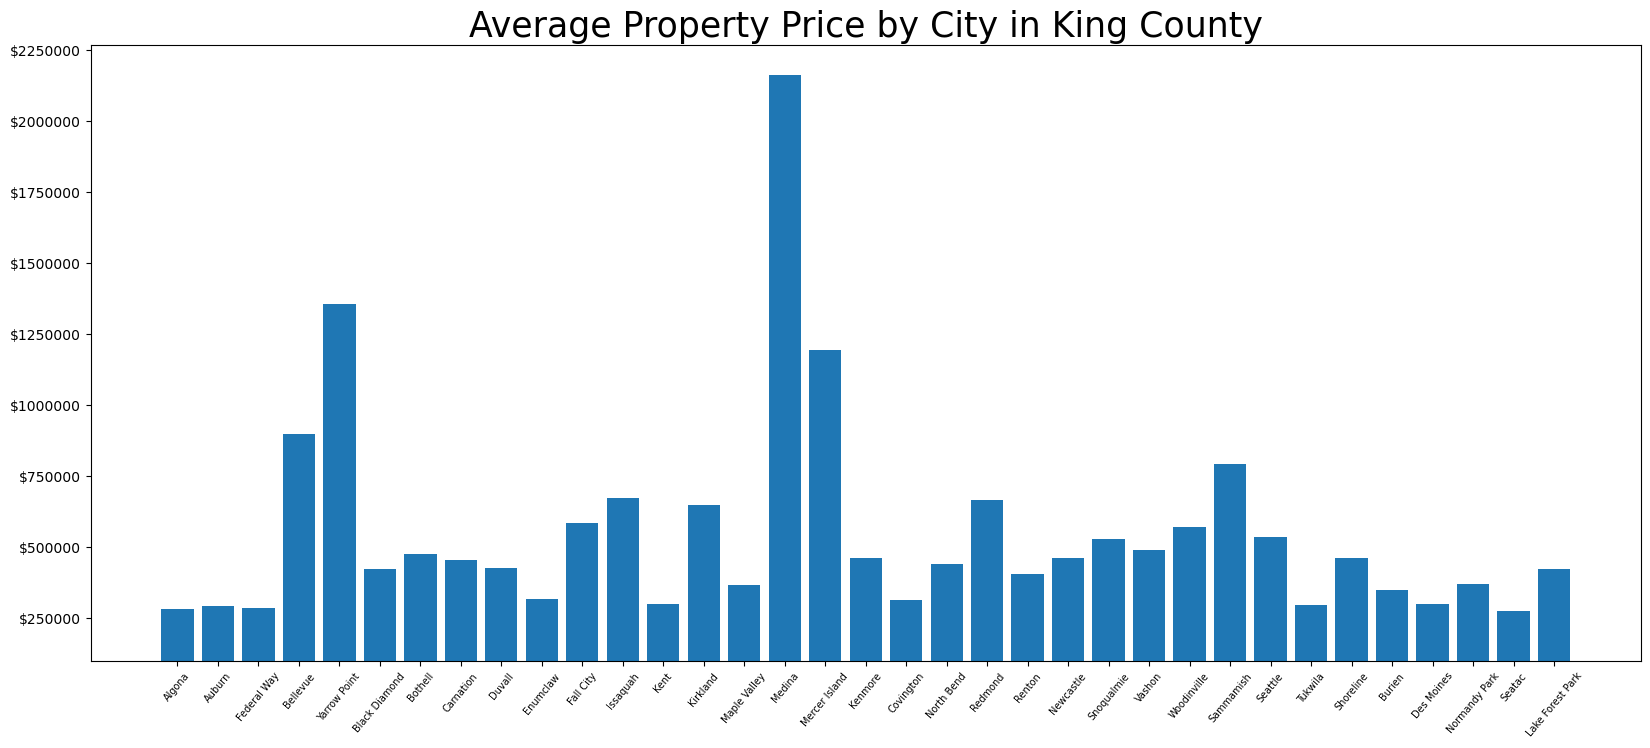

In [96]:
mean_prices = []

for key, values in city_dfs.items():
    mean = city_dfs[key]['price'].mean()
    mean_prices.append(mean)

    
    
fig, ax = plt.subplots(figsize=(20,8))

ax.bar(list(range(len(city_dfs.keys()))), mean_prices)
ax.set_xticks(list(range(len(city_dfs.keys()))))
ax.set_xticklabels(city_dfs.keys(), rotation =50, fontsize=7)
ax.set_yticks(list(range(0, 2500000, 250000)))
ax.set_yticklabels(['${}'.format(i) for i in range(0,2500000, 250000)])

ax.set_ylim(100000)

ax.set_title('Average Property Price by City in King County', fontsize=25)




plt.show()

In [98]:
data.columns, data.view

(Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'sqft_living15', 'sqft_lot15', 'cities', 'Algona', 'Auburn',
        'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill',
        'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Carnation',
        'Duvall', 'Enumclaw', 'Fall City', 'Issaquah', 'Kent', 'Kirkland',
        'Maple Valley', 'Medina', 'Mercer Island', 'Kenmore', 'Covington',
        'North Bend', 'Redmond', 'Renton', 'Newcastle', 'Snoqualmie', 'Vashon',
        'Woodinville', 'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien',
        'Des Moines', 'Normandy Park', 'Seatac', 'Lake Forest Park',
        'has_basement', 'recently_renovated'],
       dtype='object'),
 0        NONE
 1        NONE
 2        NONE
 3        NONE
 4        NONE
          ... 
 21592    NONE


boxplot data for Algona


<Figure size 640x480 with 0 Axes>

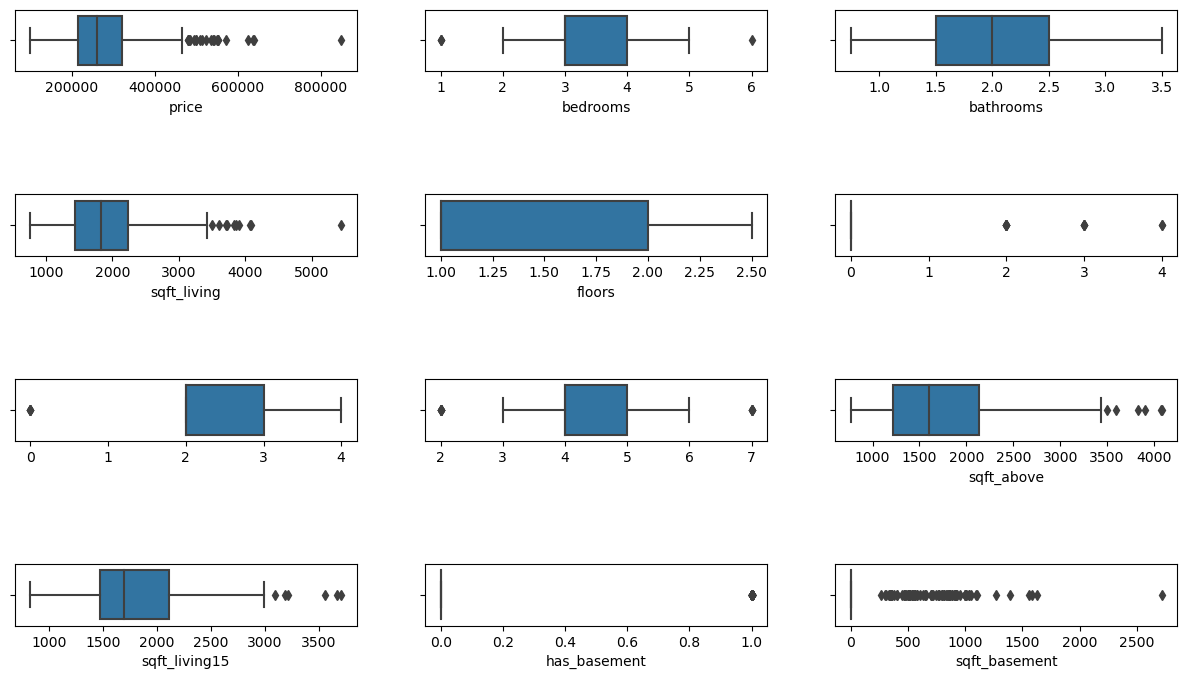

boxplot data for Auburn


<Figure size 640x480 with 0 Axes>

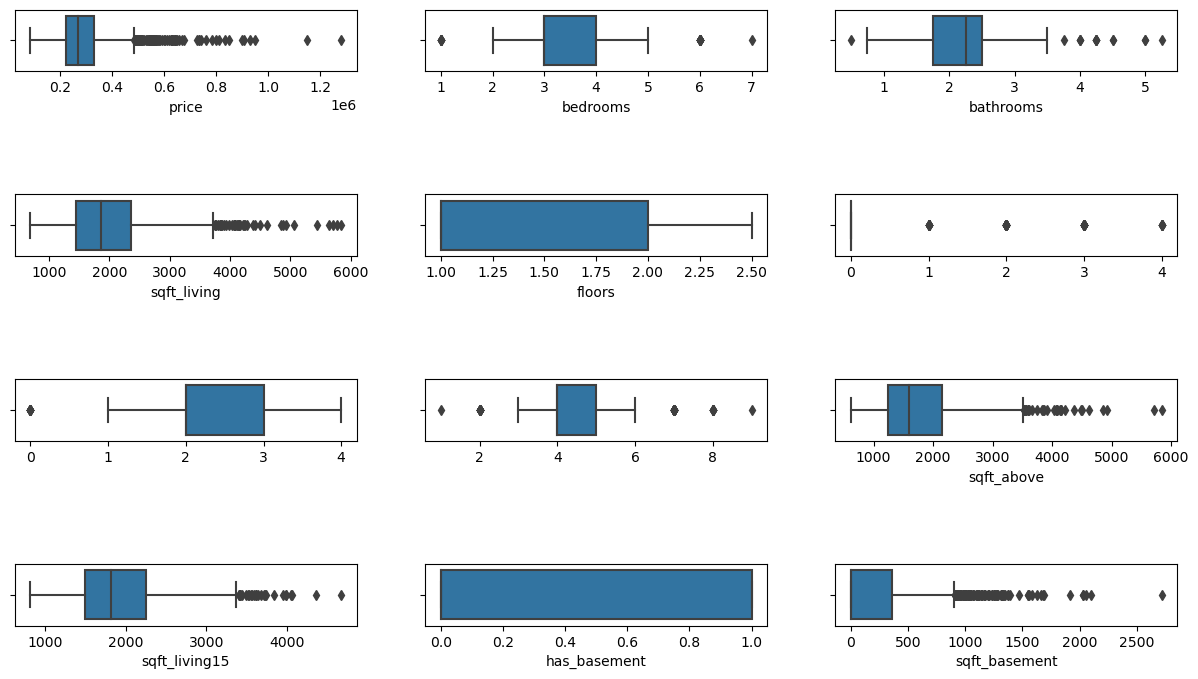

boxplot data for Federal Way


<Figure size 640x480 with 0 Axes>

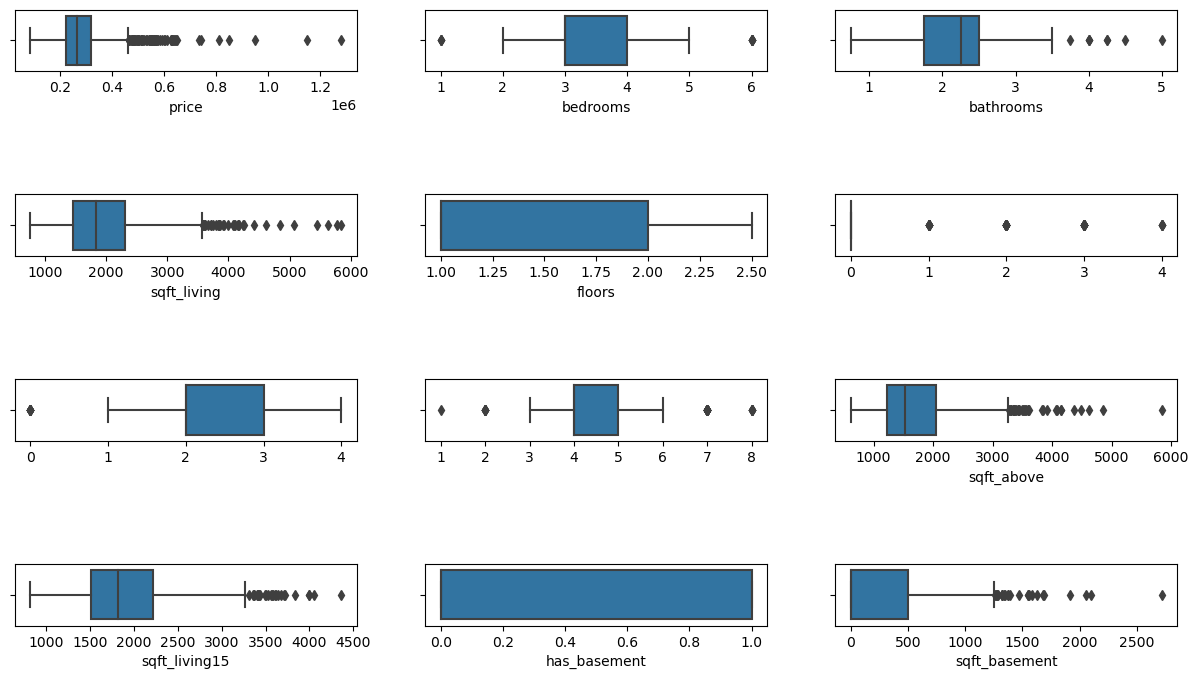

boxplot data for Bellevue


<Figure size 640x480 with 0 Axes>

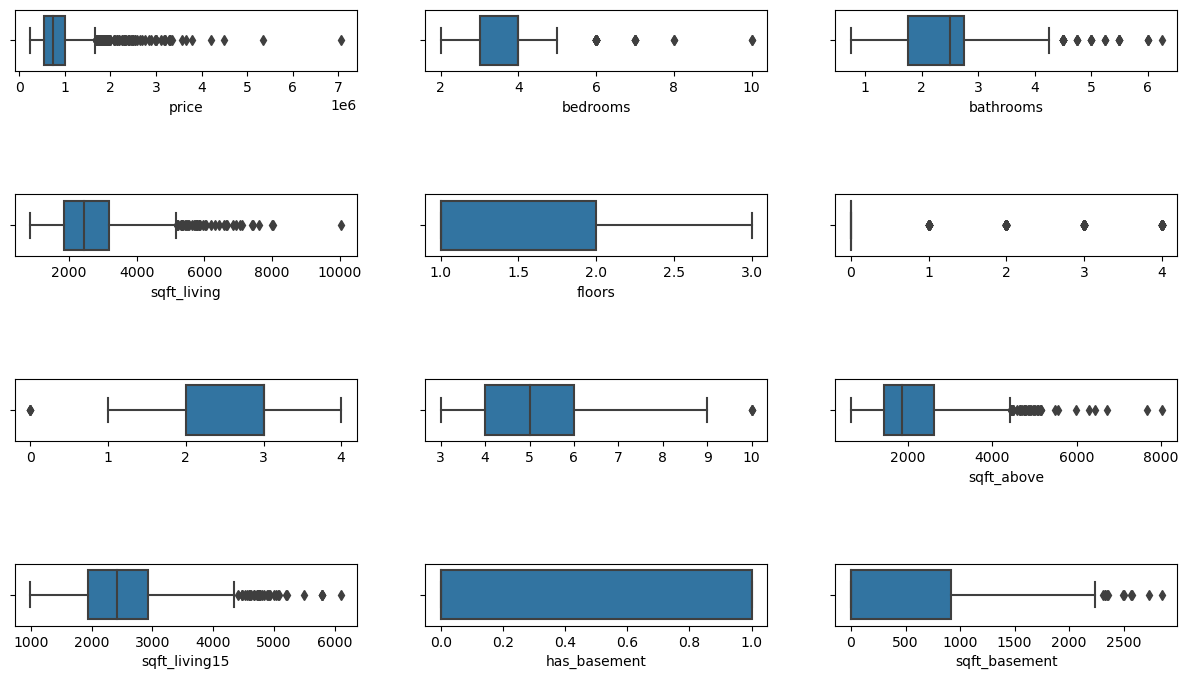

boxplot data for Yarrow Point


<Figure size 640x480 with 0 Axes>

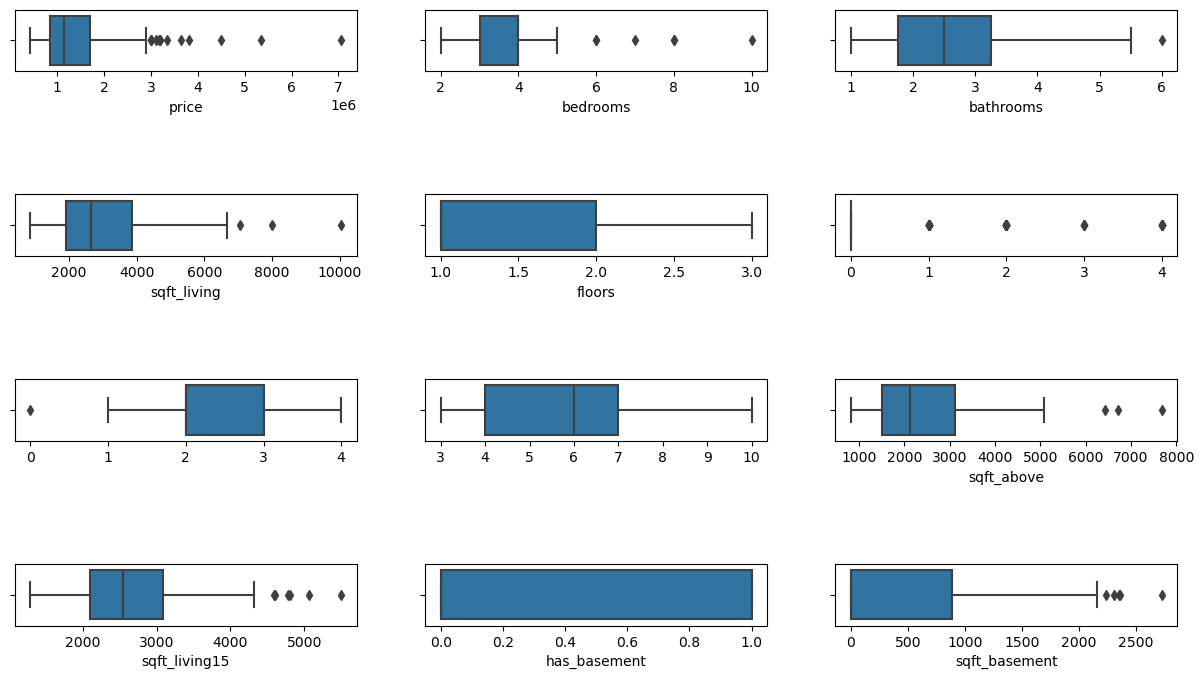

boxplot data for Black Diamond


<Figure size 640x480 with 0 Axes>

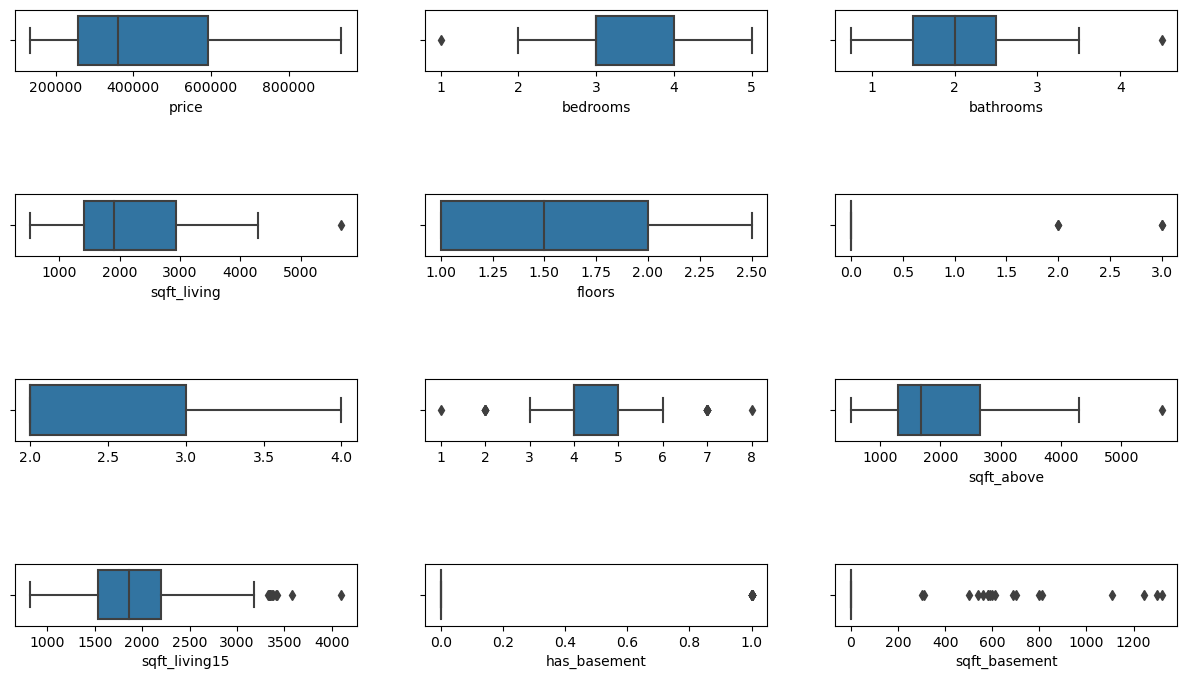

boxplot data for Bothell


<Figure size 640x480 with 0 Axes>

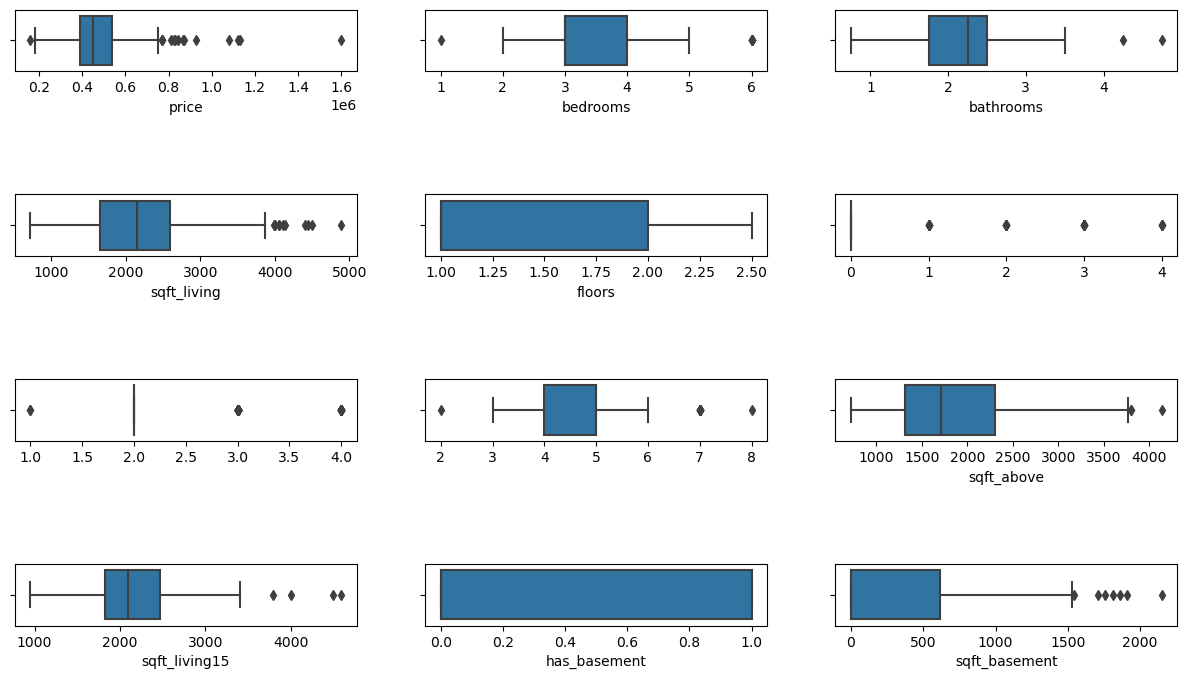

boxplot data for Carnation


<Figure size 640x480 with 0 Axes>

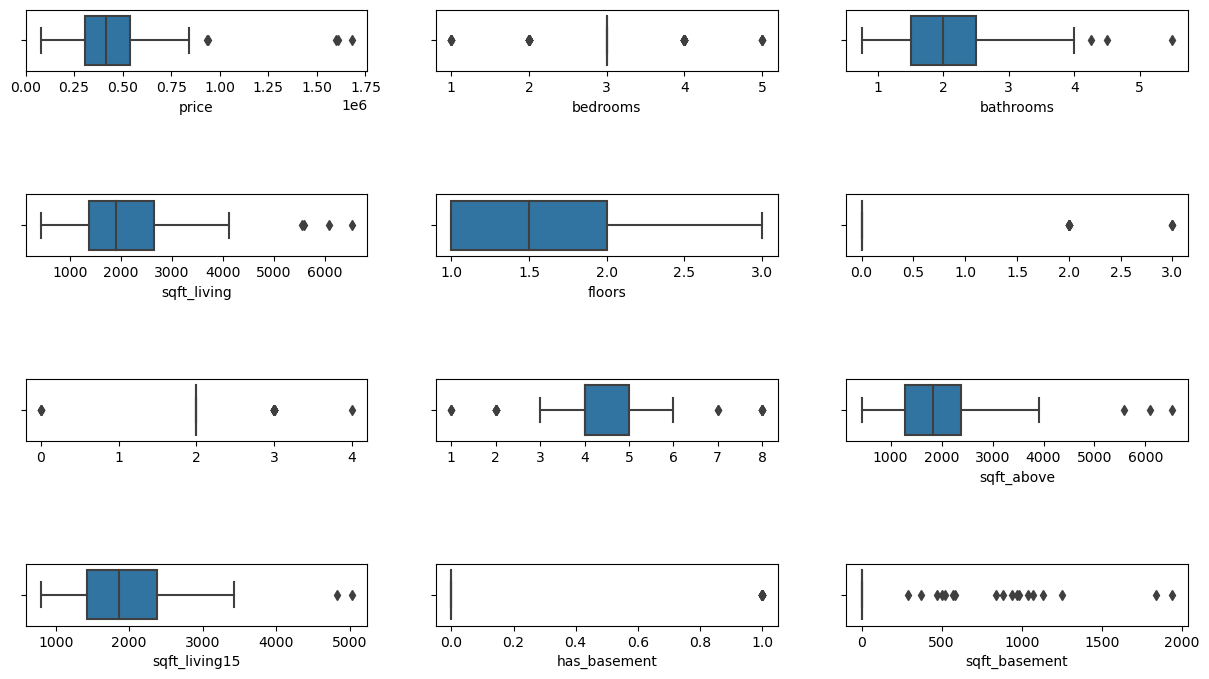

boxplot data for Duvall


<Figure size 640x480 with 0 Axes>

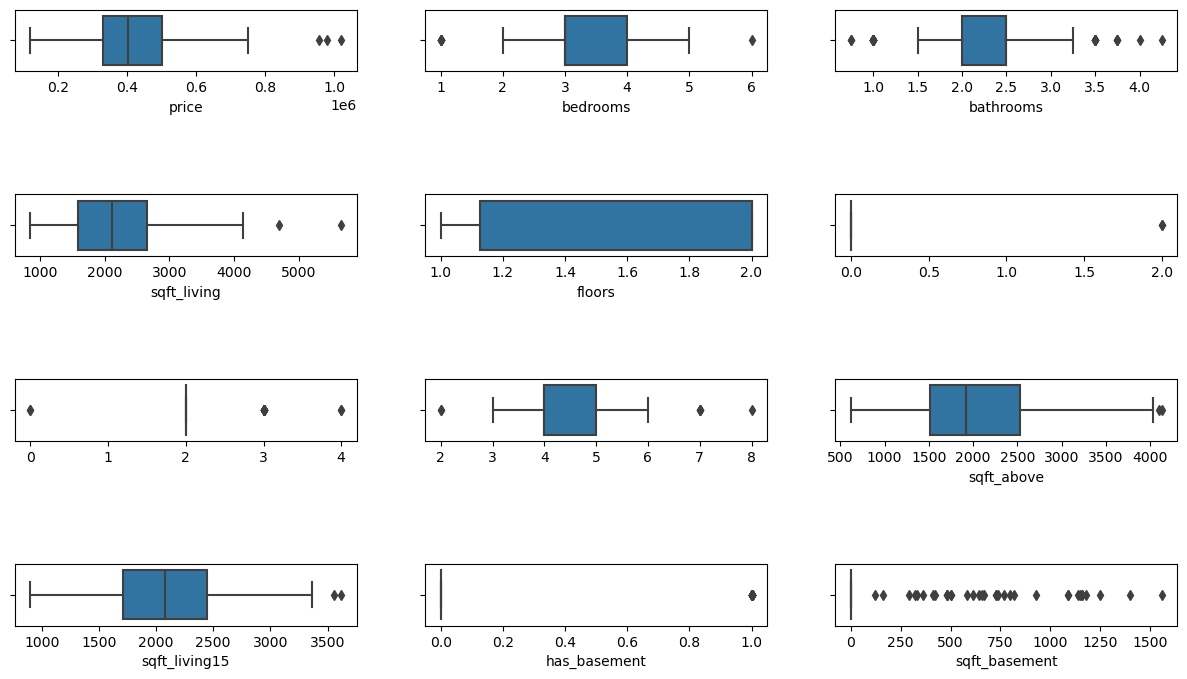

boxplot data for Enumclaw


<Figure size 640x480 with 0 Axes>

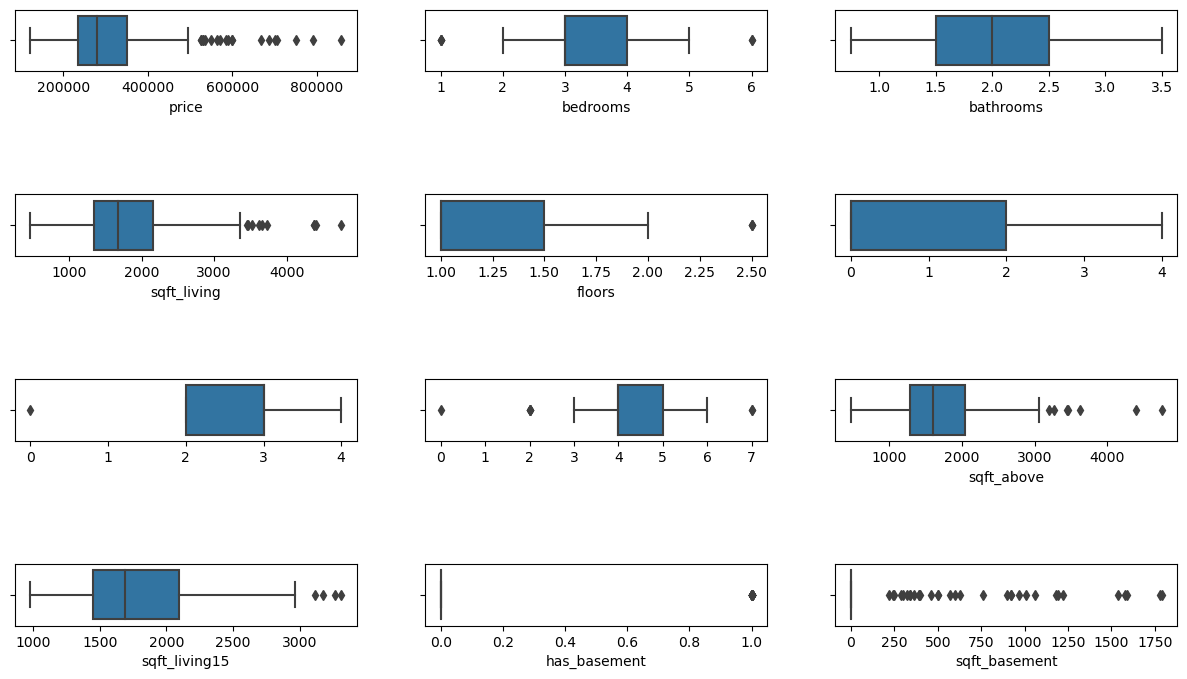

boxplot data for Fall City


<Figure size 640x480 with 0 Axes>

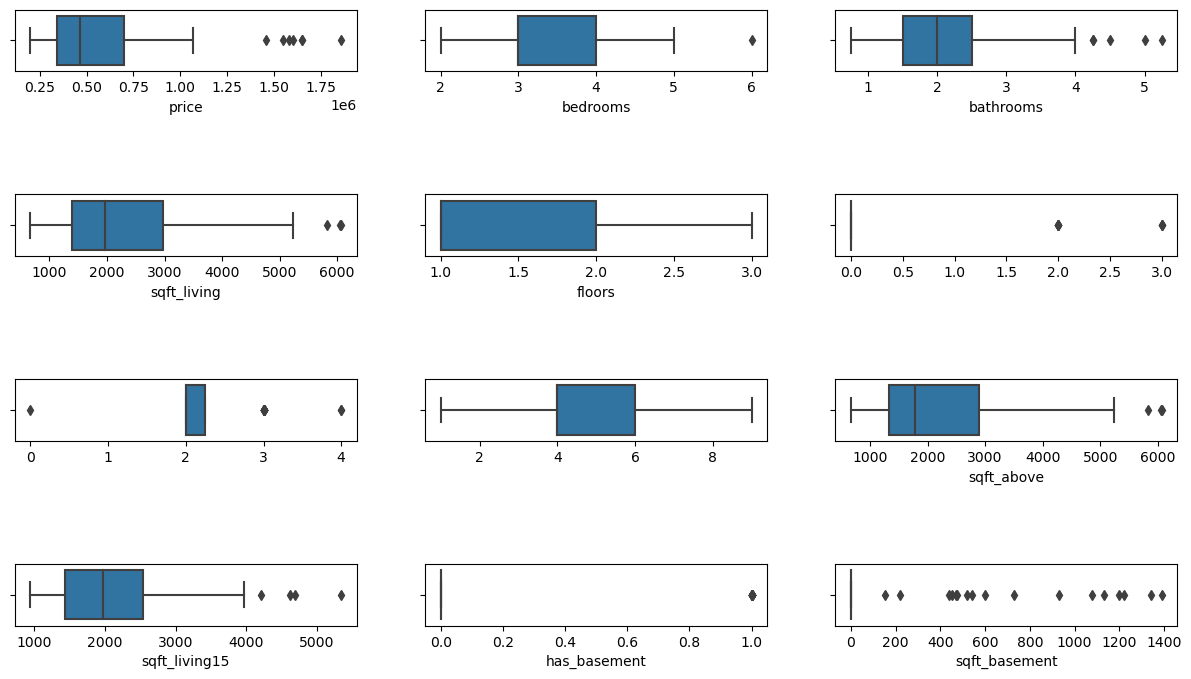

boxplot data for Issaquah


<Figure size 640x480 with 0 Axes>

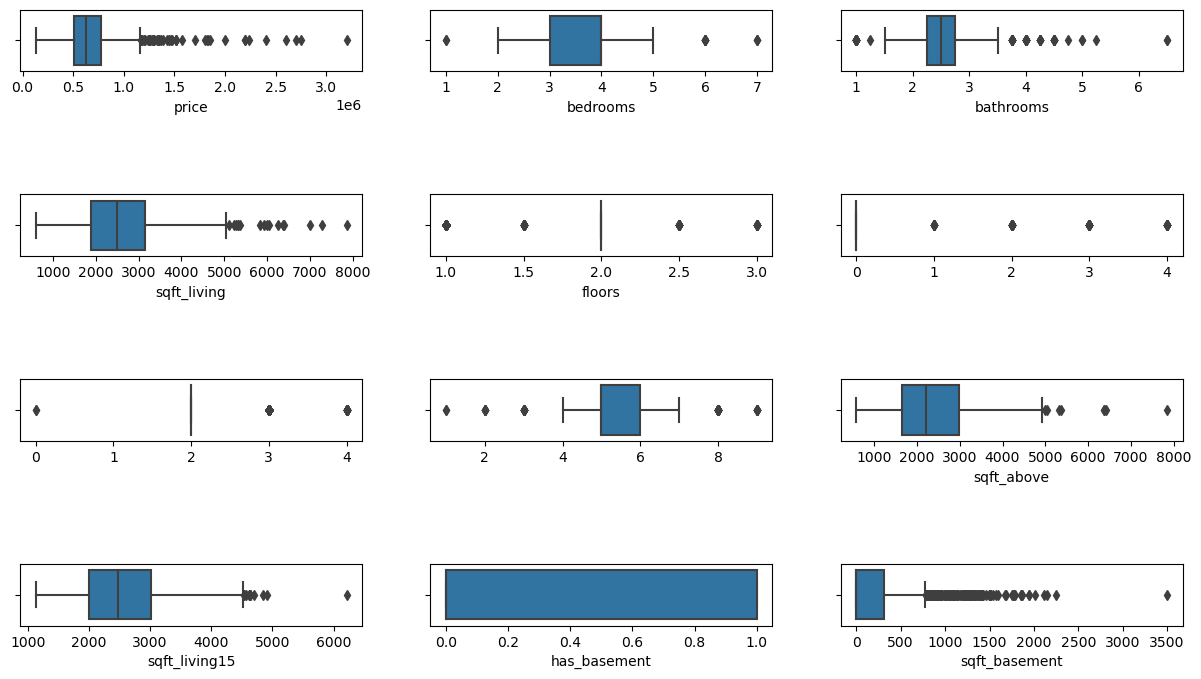

boxplot data for Kent


<Figure size 640x480 with 0 Axes>

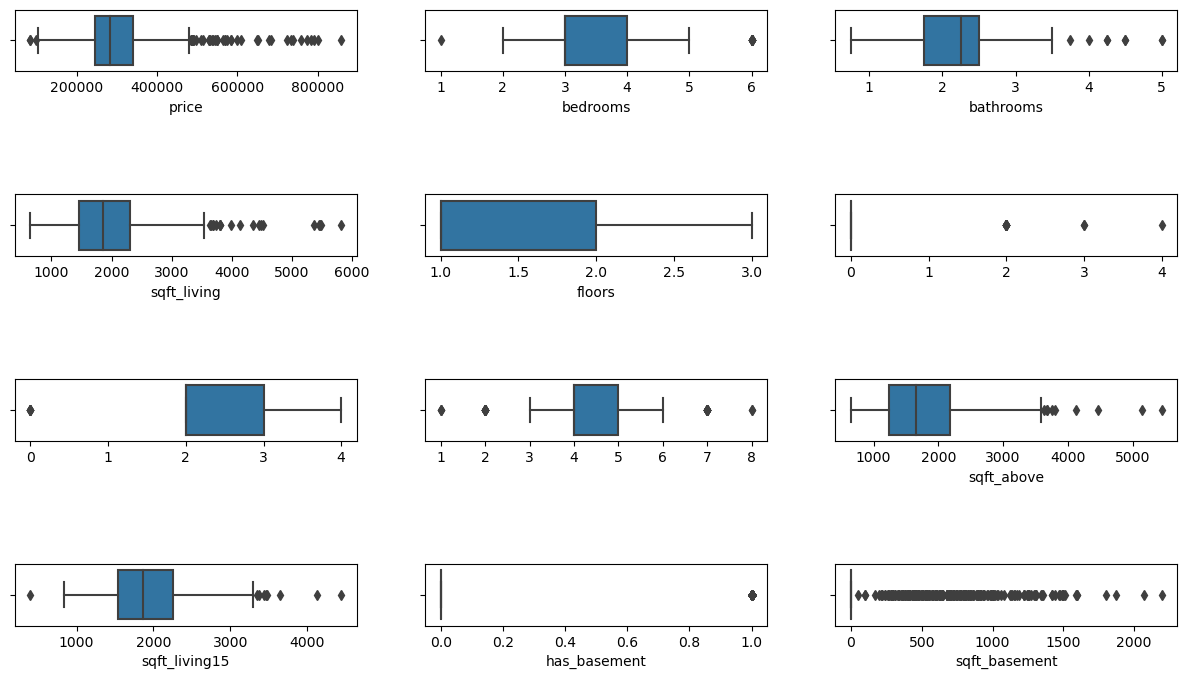

boxplot data for Kirkland


<Figure size 640x480 with 0 Axes>

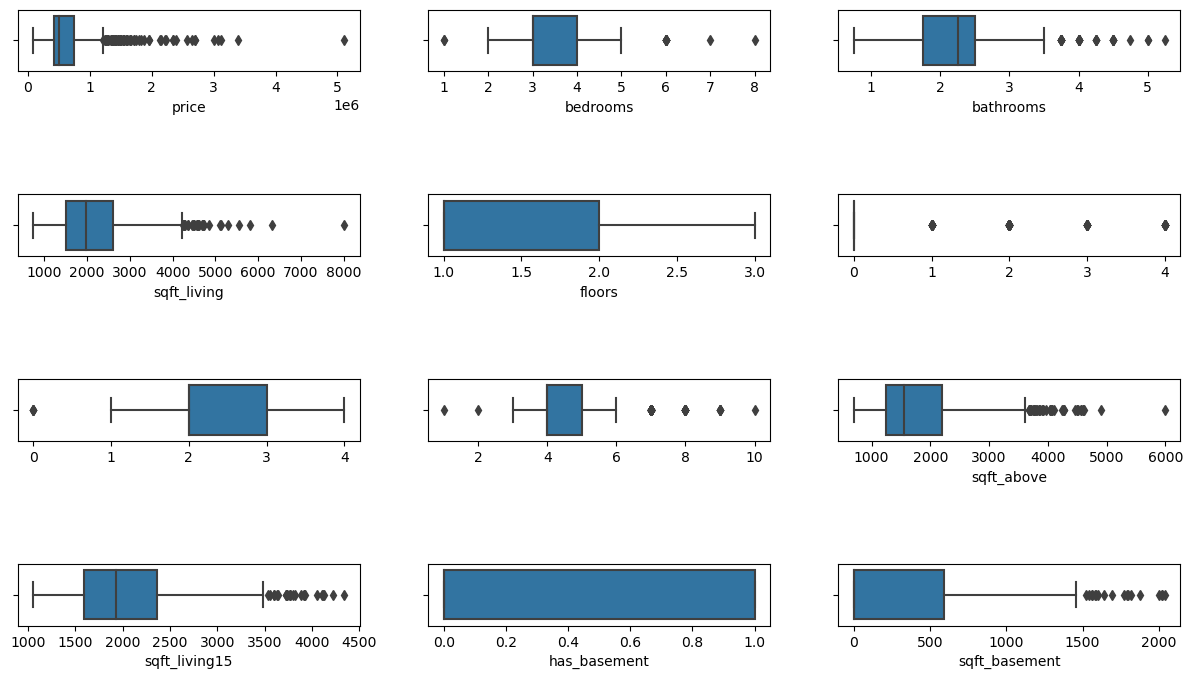

boxplot data for Maple Valley


<Figure size 640x480 with 0 Axes>

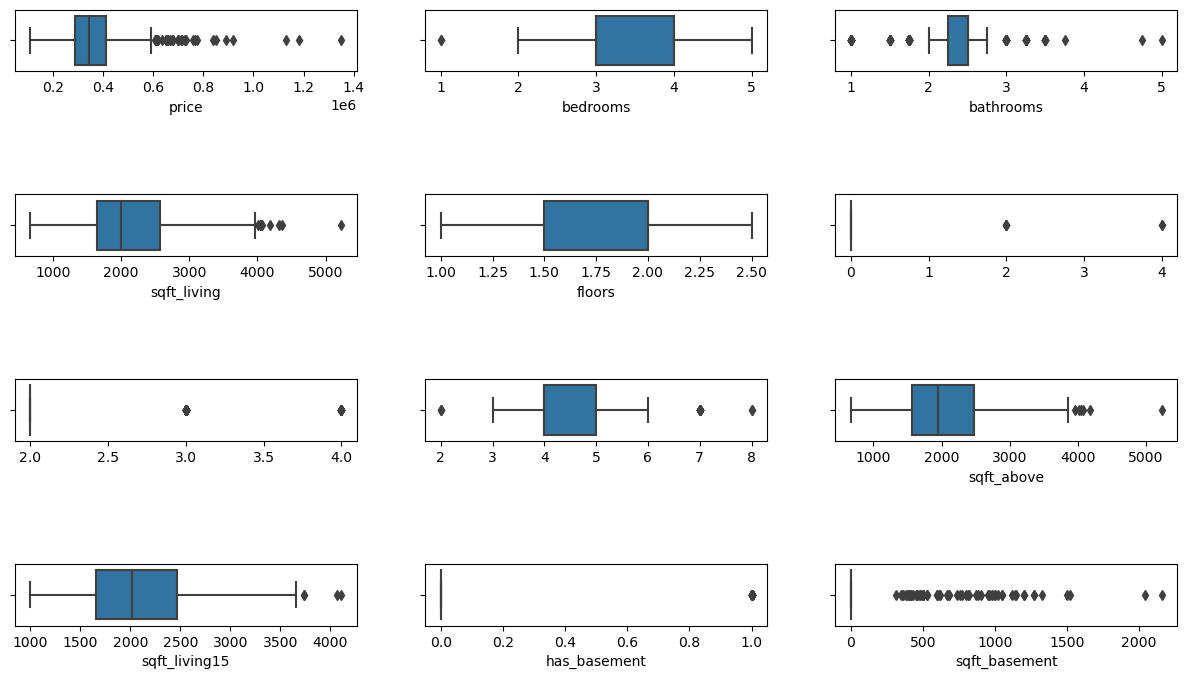

boxplot data for Medina


<Figure size 640x480 with 0 Axes>

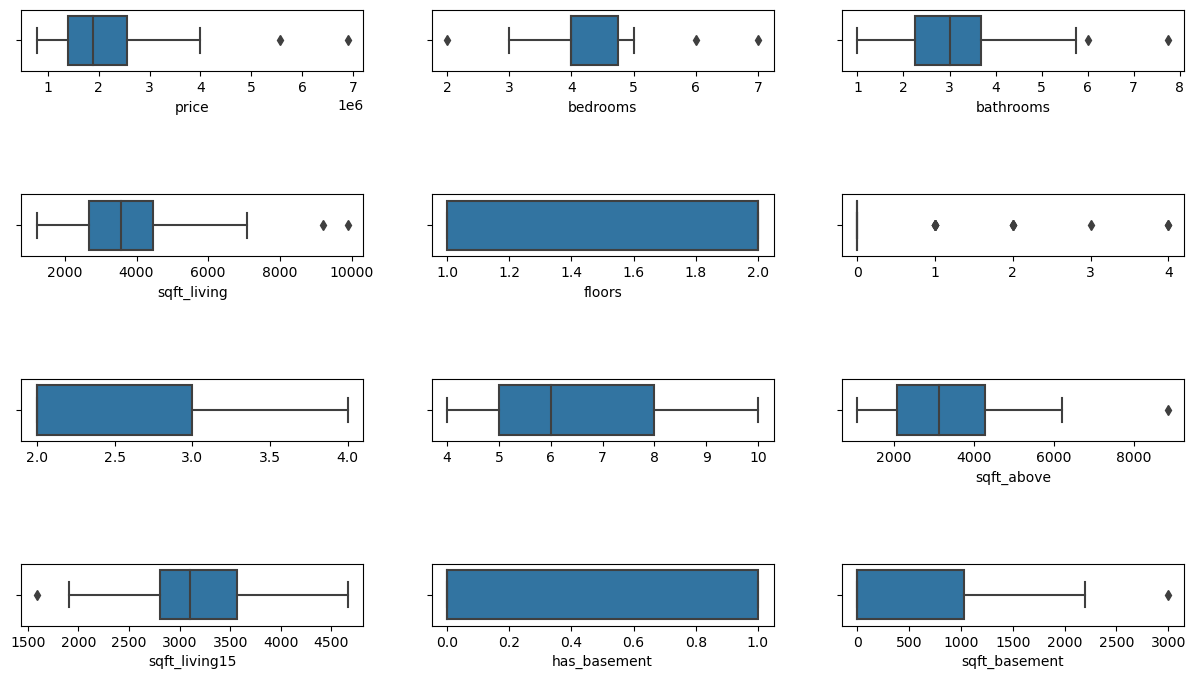

boxplot data for Mercer Island


<Figure size 640x480 with 0 Axes>

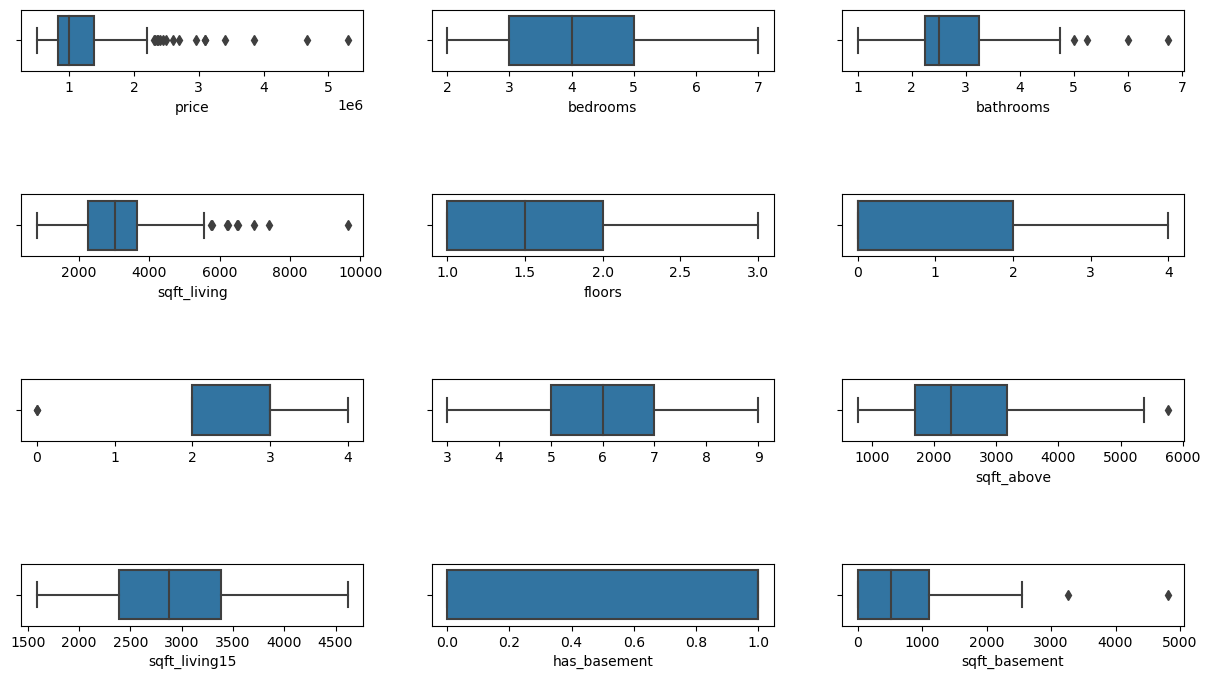

boxplot data for Kenmore


<Figure size 640x480 with 0 Axes>

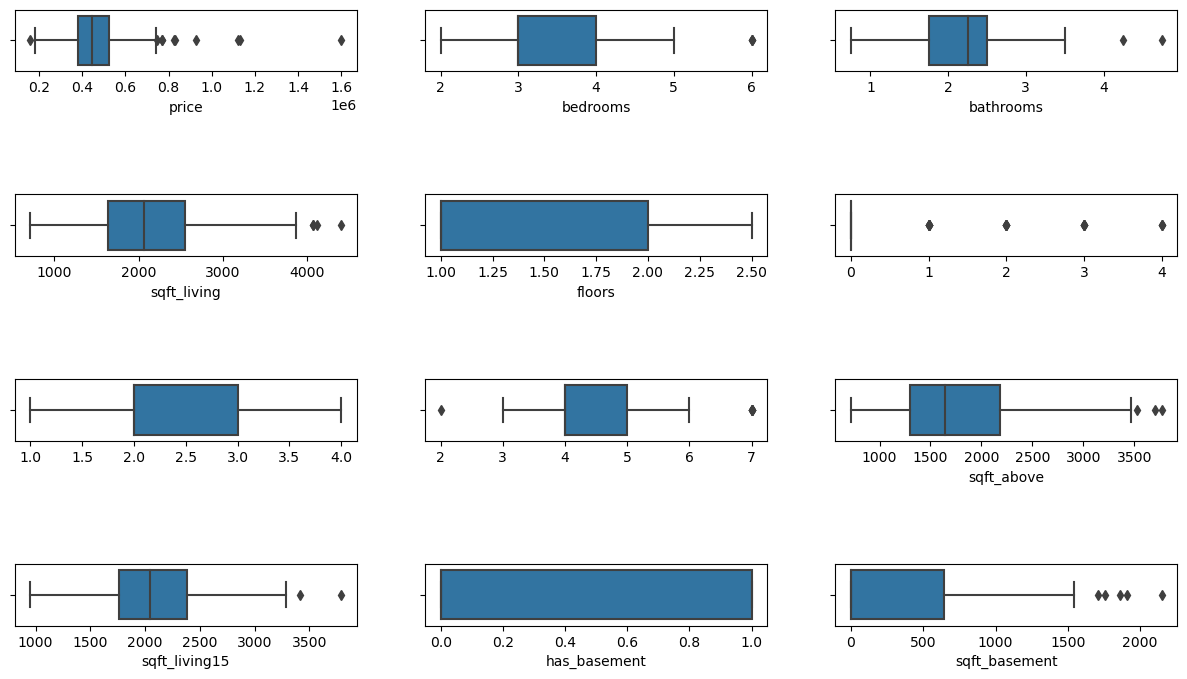

boxplot data for Covington


<Figure size 640x480 with 0 Axes>

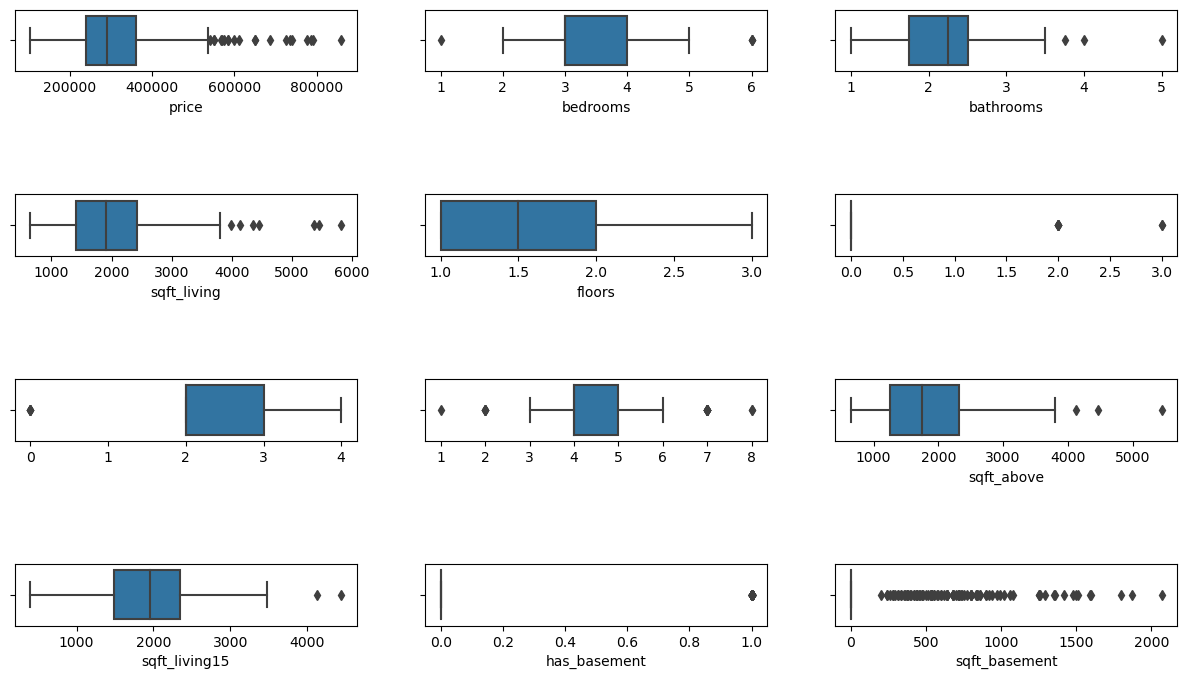

boxplot data for North Bend


<Figure size 640x480 with 0 Axes>

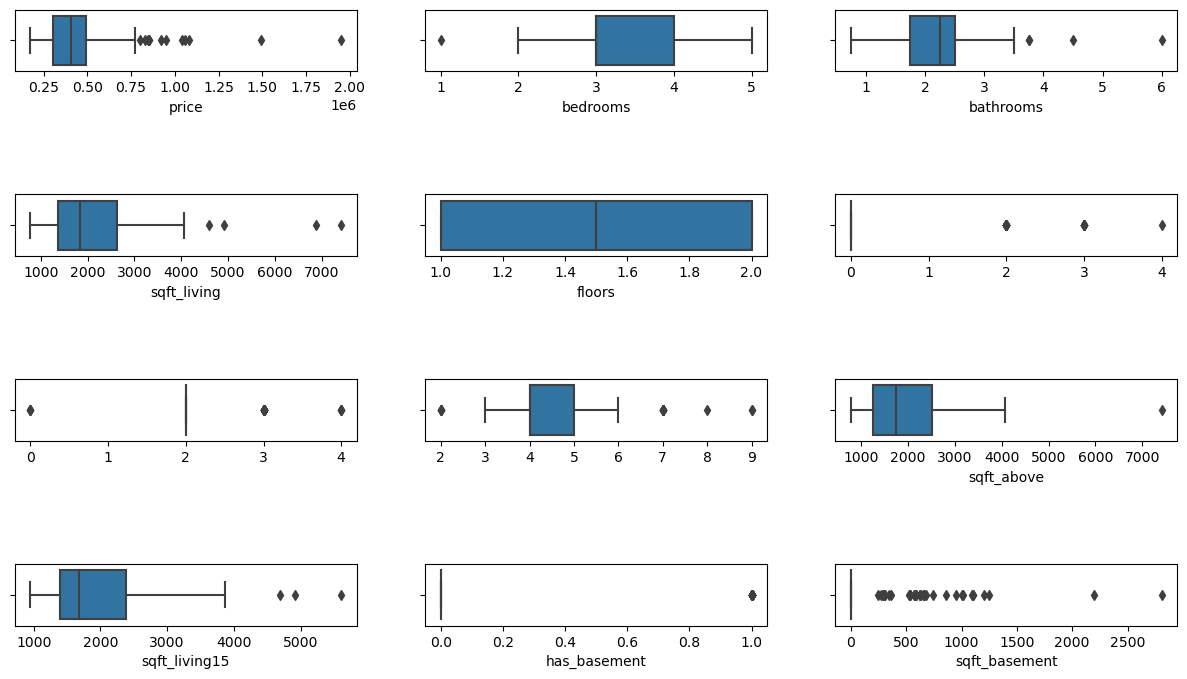

boxplot data for Redmond


<Figure size 640x480 with 0 Axes>

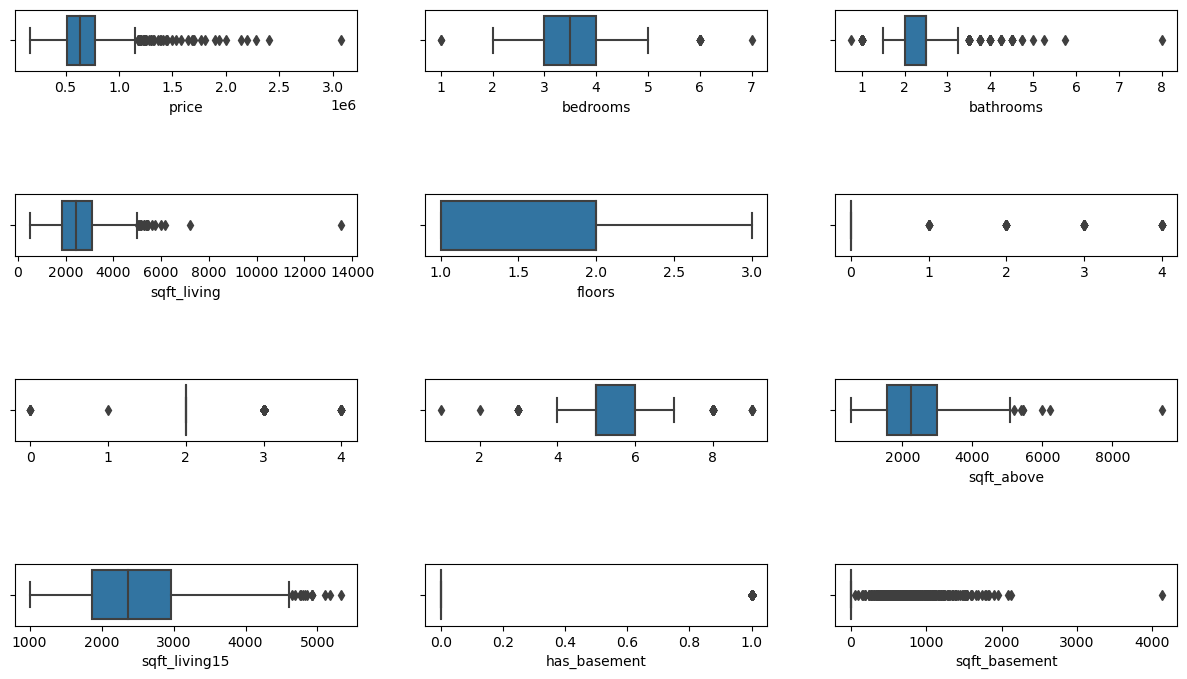

boxplot data for Renton


<Figure size 640x480 with 0 Axes>

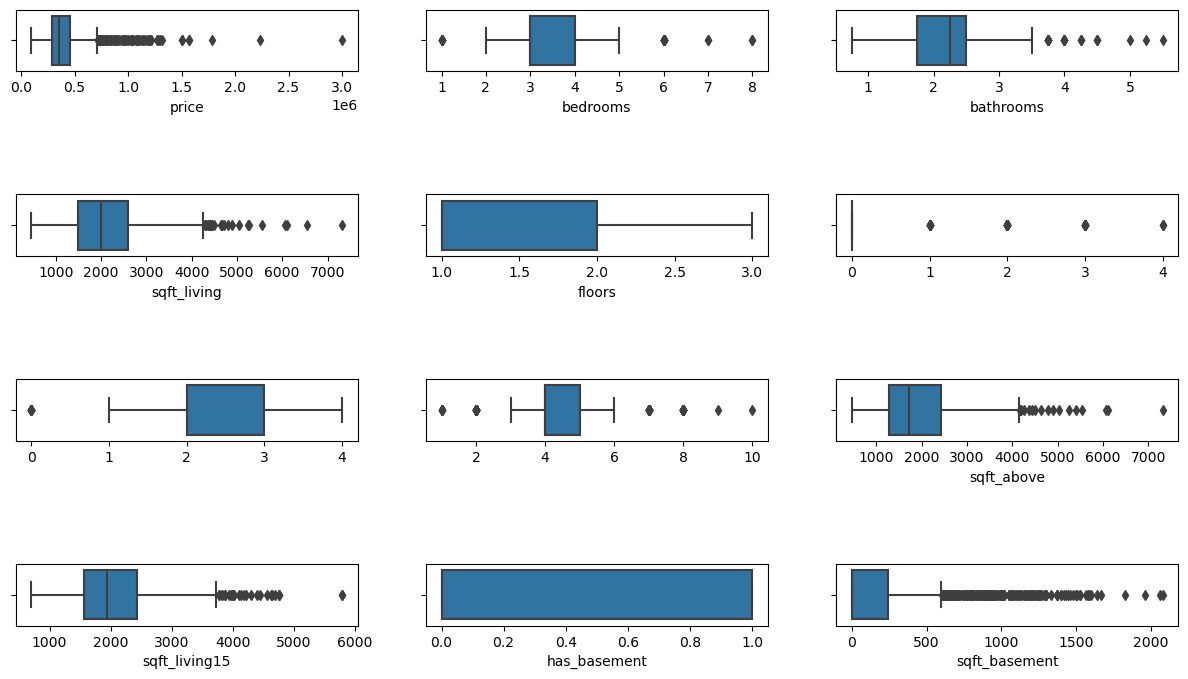

boxplot data for Newcastle


<Figure size 640x480 with 0 Axes>

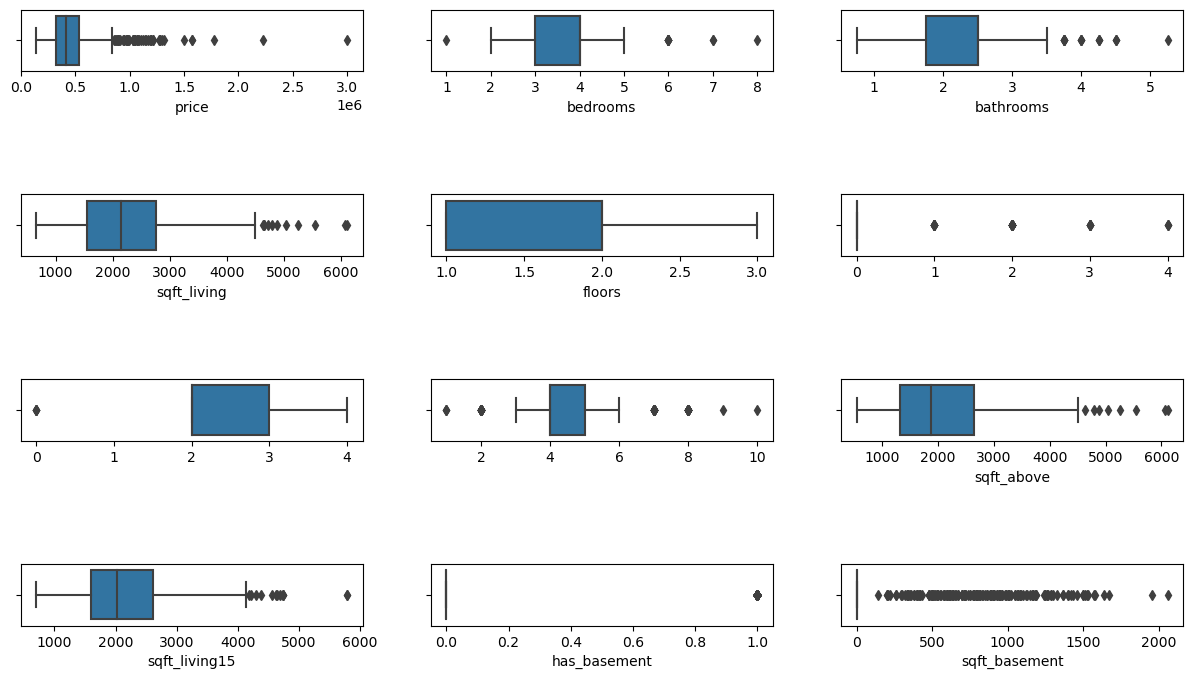

boxplot data for Snoqualmie


<Figure size 640x480 with 0 Axes>

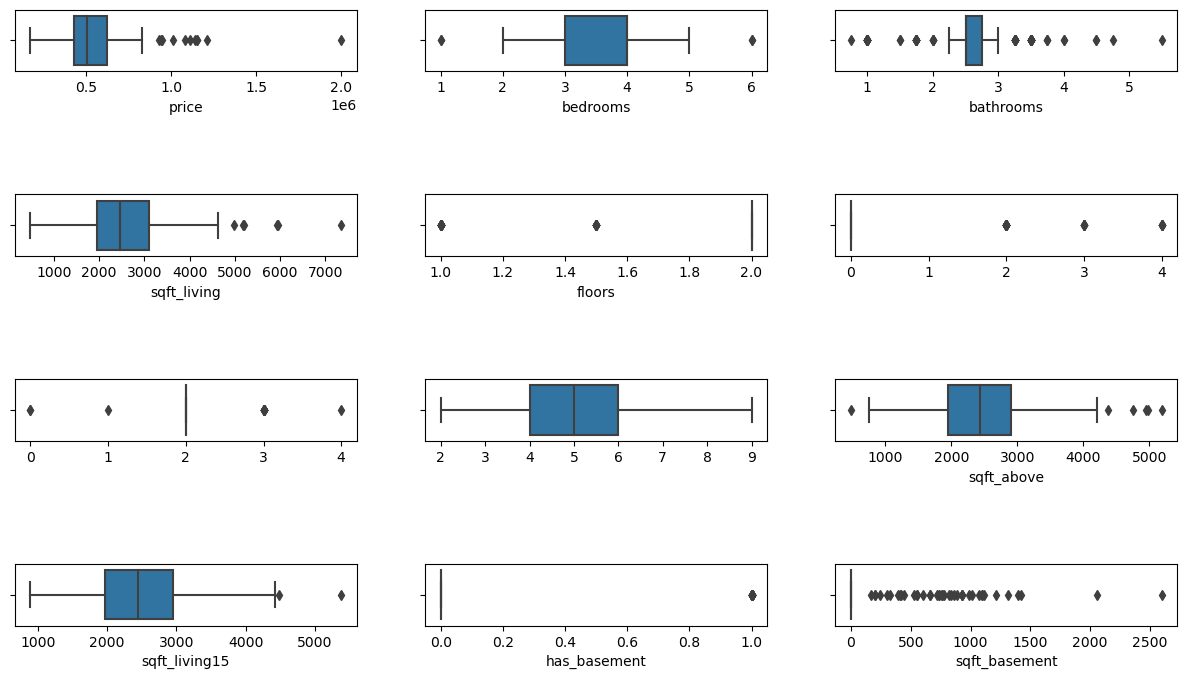

boxplot data for Vashon


<Figure size 640x480 with 0 Axes>

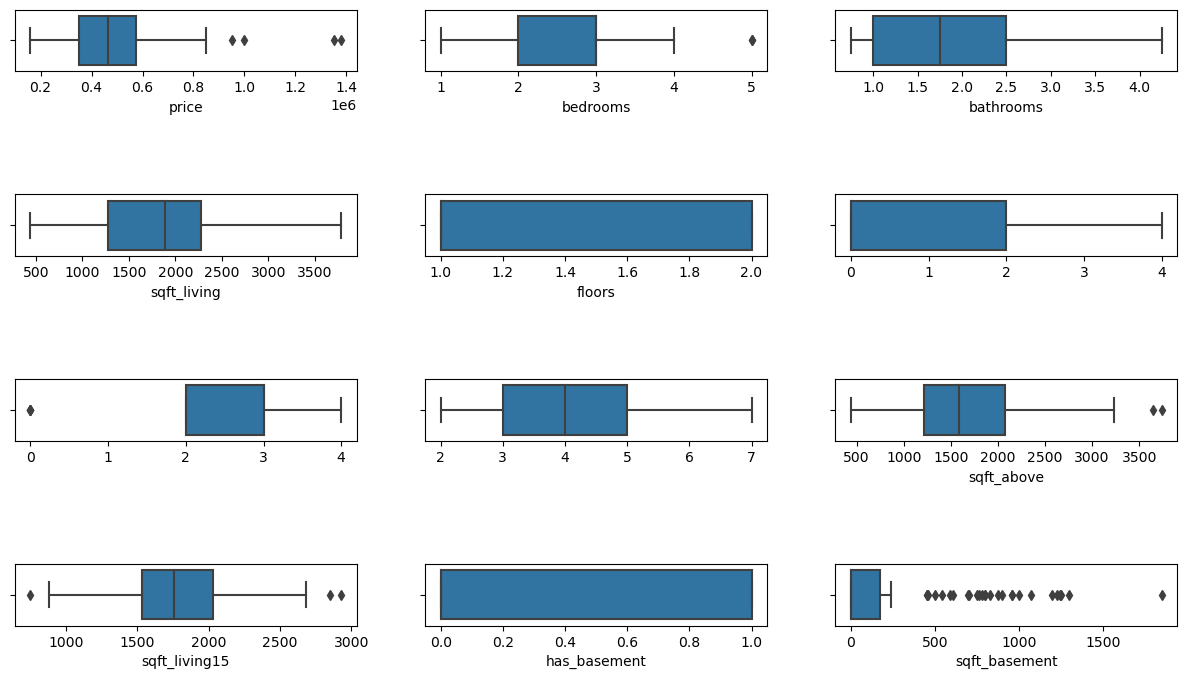

boxplot data for Woodinville


<Figure size 640x480 with 0 Axes>

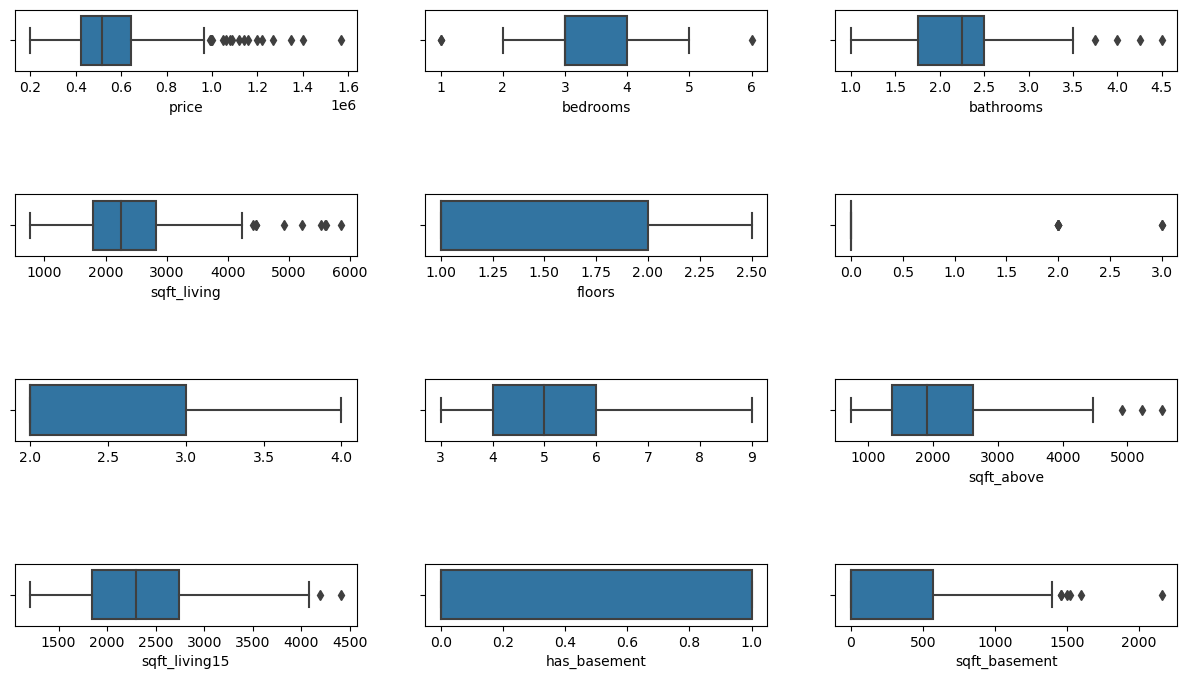

boxplot data for Sammamish


<Figure size 640x480 with 0 Axes>

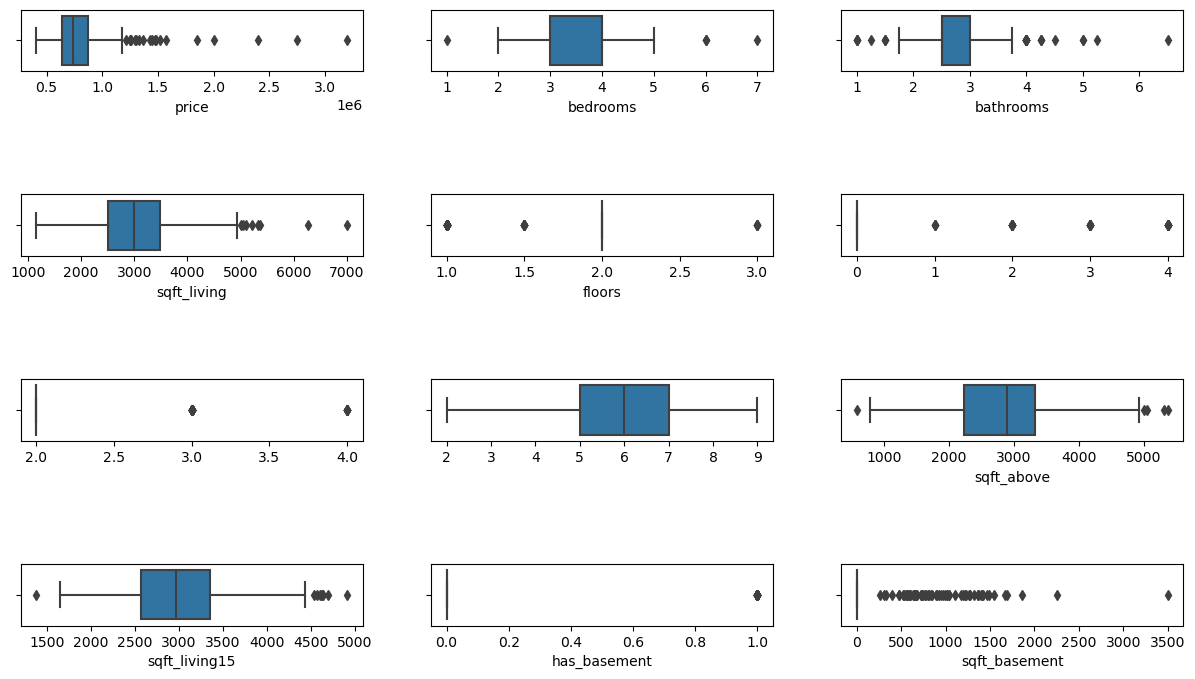

boxplot data for Seattle


<Figure size 640x480 with 0 Axes>

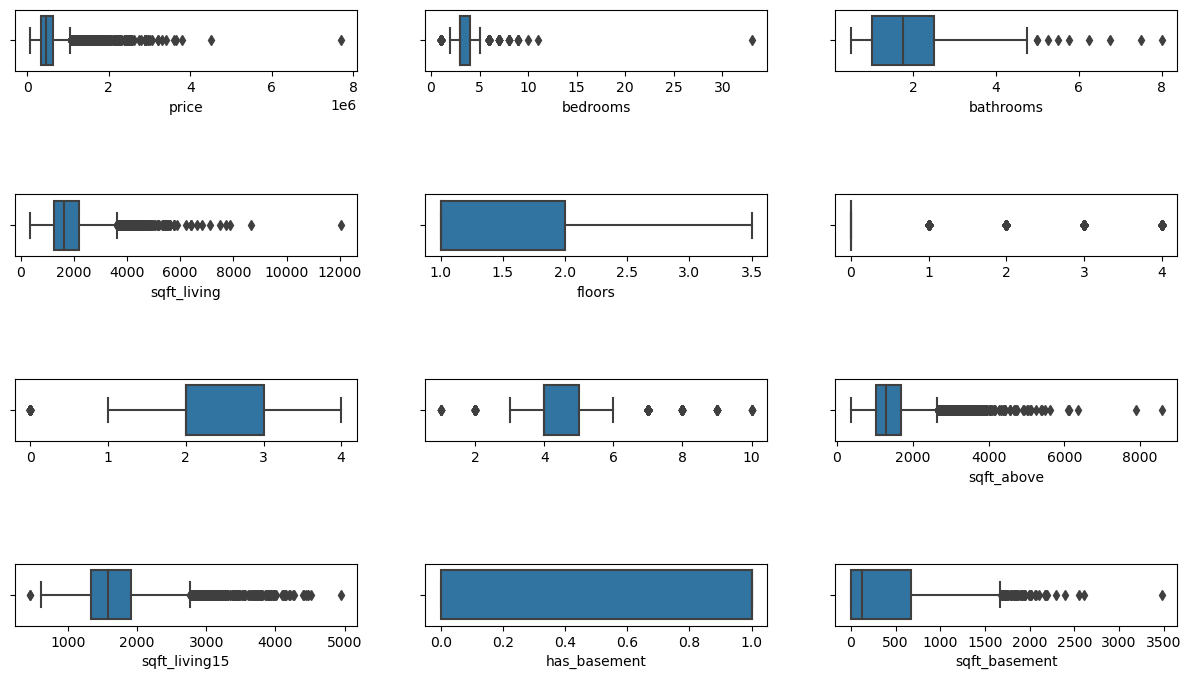

boxplot data for Tukwila


<Figure size 640x480 with 0 Axes>

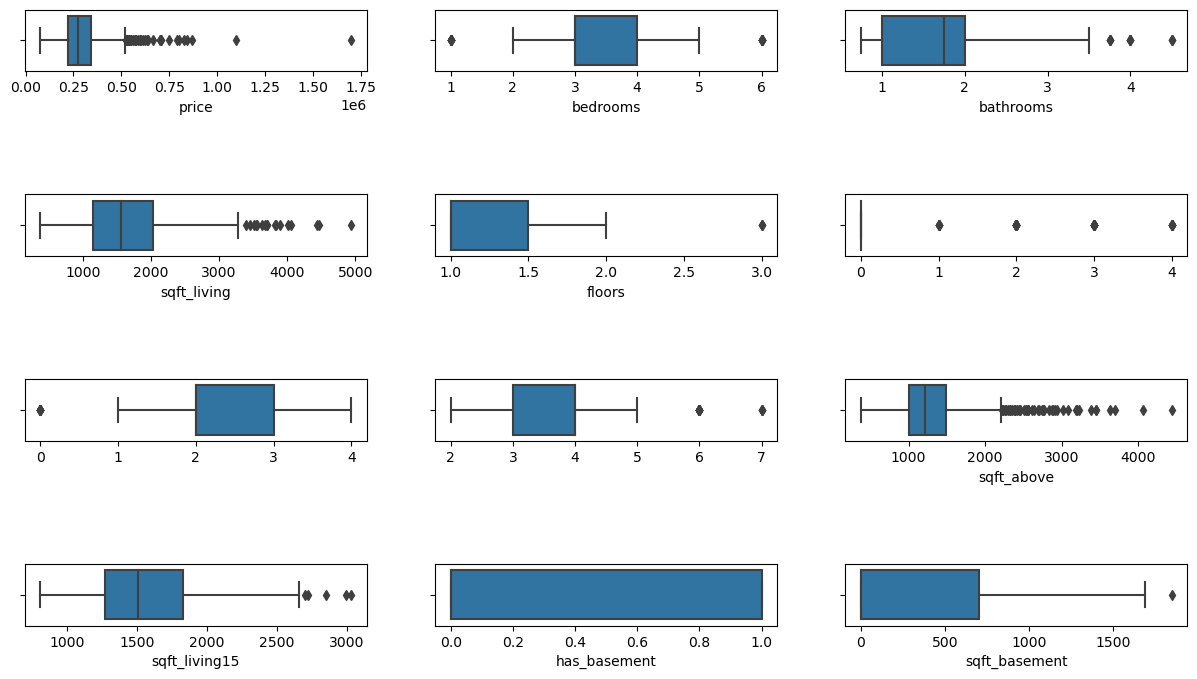

boxplot data for Shoreline


<Figure size 640x480 with 0 Axes>

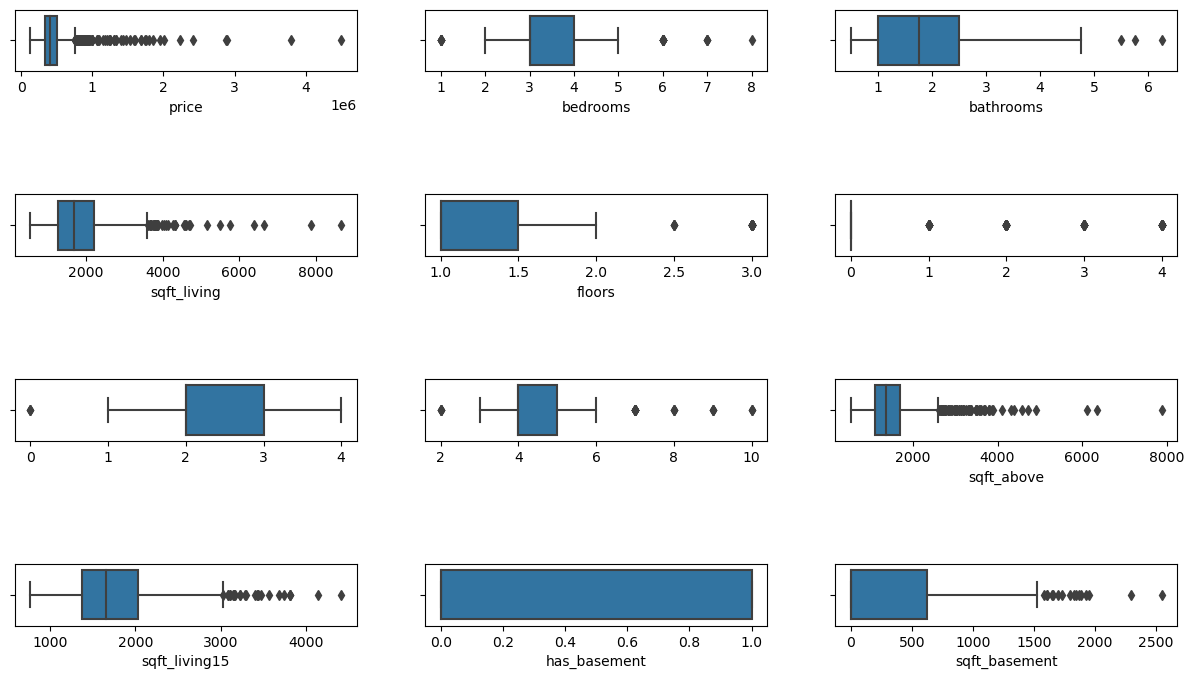

boxplot data for Burien


<Figure size 640x480 with 0 Axes>

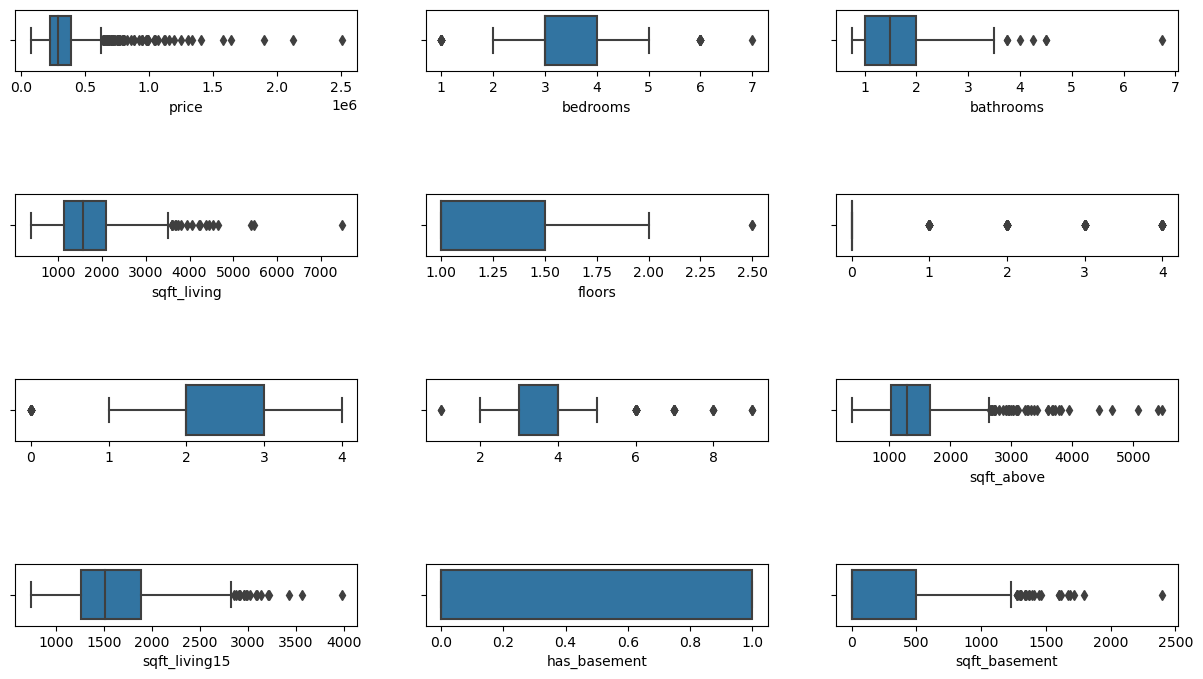

boxplot data for Des Moines


<Figure size 640x480 with 0 Axes>

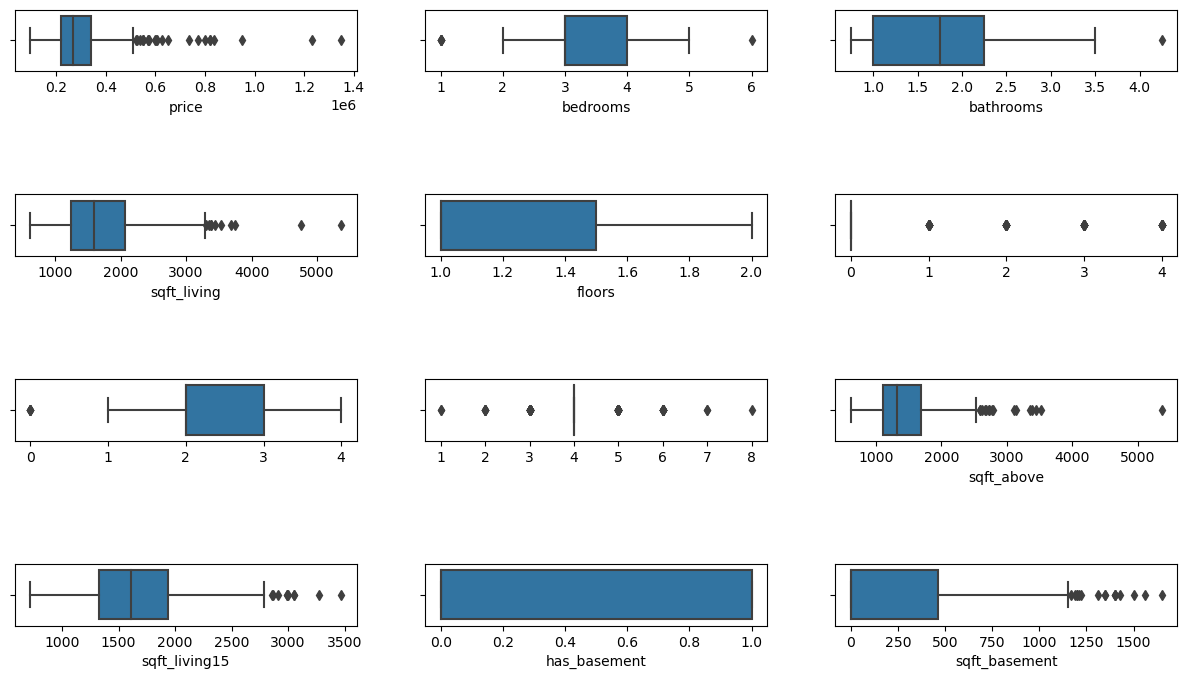

boxplot data for Normandy Park


<Figure size 640x480 with 0 Axes>

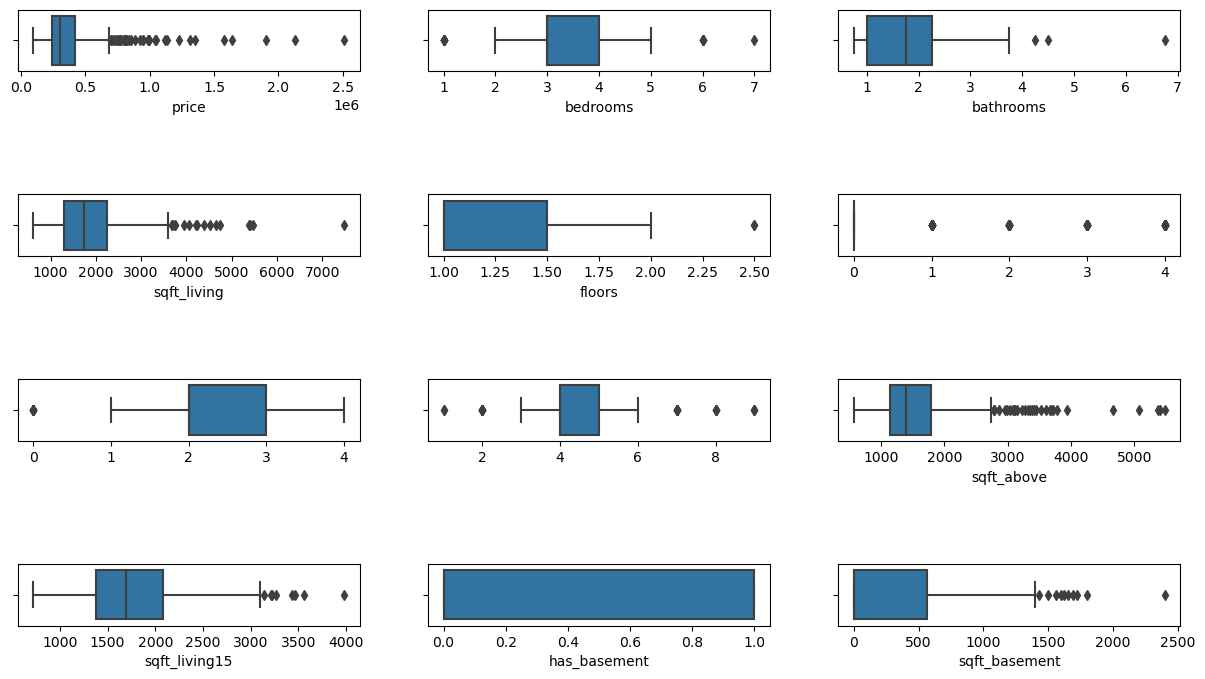

boxplot data for Seatac


<Figure size 640x480 with 0 Axes>

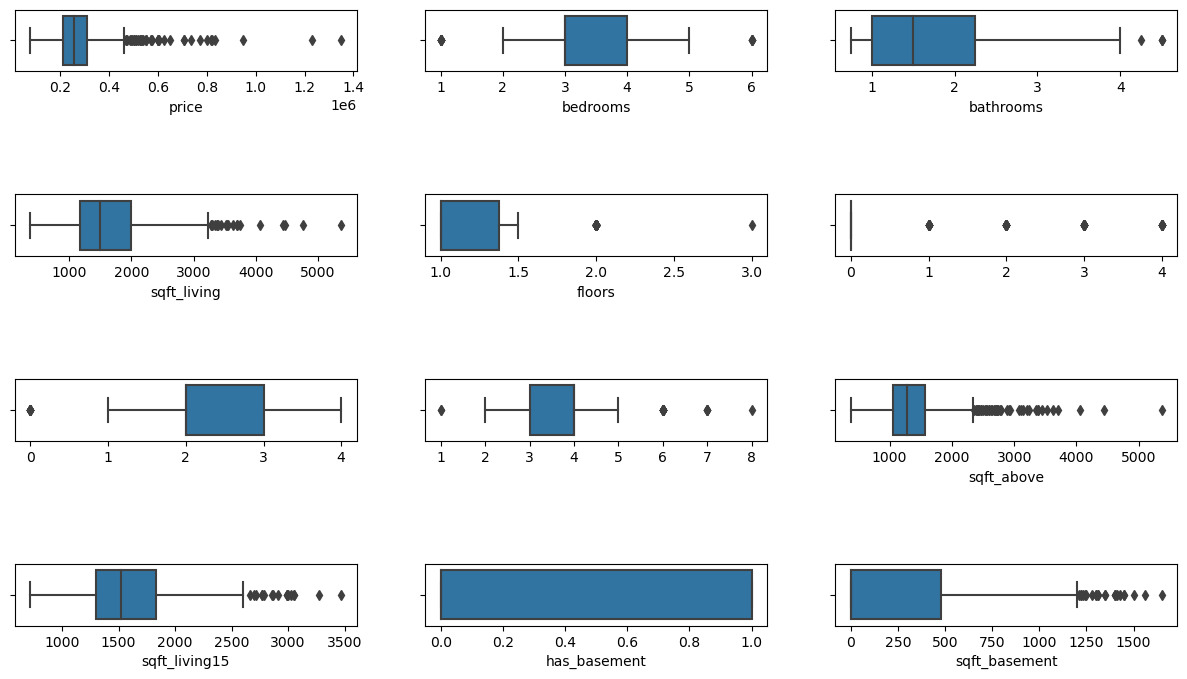

boxplot data for Lake Forest Park


<Figure size 640x480 with 0 Axes>

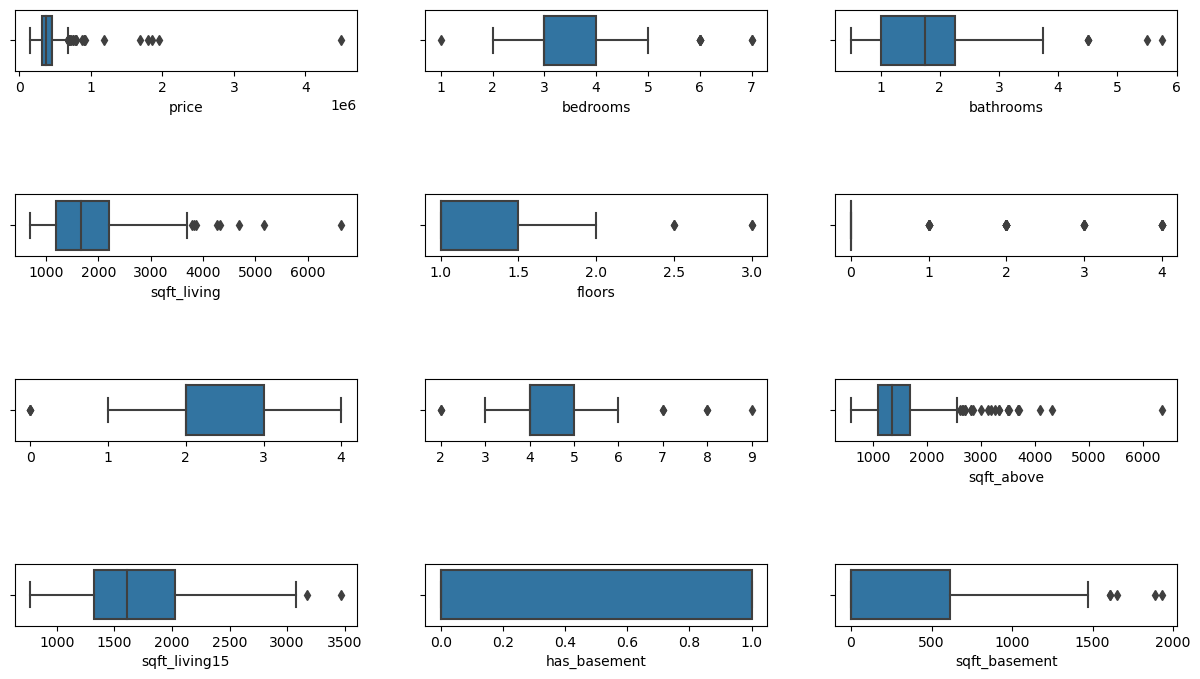

In [114]:
import warnings
warnings.filterwarnings("ignore") 

city_list1 = list(city_dfs.keys())[0:6]
boxplot_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living','floors', 'view', 'condition',
               'grade', 'sqft_above','sqft_living15', 'has_basement']

for i in city_dfs.keys():
    print('boxplot data for {}'.format(i))
    
    fig, ax = plt.subplots(figsize=(15,8), nrows=4, ncols=3)
    plt.subplots_adjust(hspace=2)
    
    sns.boxplot(city_dfs[i]['price'],data=city_dfs[i],ax=ax[0][0])
    sns.boxplot(city_dfs[i]['bedrooms'],data=city_dfs[i],ax=ax[0][1])
    sns.boxplot(city_dfs[i]['bathrooms'],data=city_dfs[i],ax=ax[0][2])
    sns.boxplot(city_dfs[i]['sqft_living'],data=city_dfs[i],ax=ax[1][0])
    sns.boxplot(city_dfs[i]['floors'],data=city_dfs[i],ax=ax[1][1])
    sns.boxplot(city_dfs[i]['view'].cat.codes,data=city_dfs[i],ax=ax[1][2])
    sns.boxplot(city_dfs[i]['condition'].cat.codes,data=city_dfs[i],ax=ax[2][0])
    sns.boxplot(city_dfs[i]['grade'].cat.codes,data=city_dfs[i],ax=ax[2][1])
    sns.boxplot(city_dfs[i]['sqft_above'],data=city_dfs[i],ax=ax[2][2])
    sns.boxplot(city_dfs[i]['sqft_living15'],data=city_dfs[i],ax=ax[3][0])
    sns.boxplot(city_dfs[i]['has_basement'],data=city_dfs[i],ax=ax[3][1])
    sns.boxplot(city_dfs[i]['sqft_basement'],data=city_dfs[i],ax=ax[3][2])
    
    plt.show()
    
    plt.clf()
    



    
    